In [3]:
import pandas as pd


In [4]:
import pandas as pd

file_path = "GEDEvent_v25_1.xlsx"

# Columns we actually want to keep
use_cols = [
    "year", "country", 
    "conflict_name", "dyad_name", 
    "side_a", "side_b", 
    "type_of_violence", 
    "adm_1", "adm_2", 
    "latitude", "longitude", 
    "event_clarity", 
    "date_start", "date_end", 
    "best", "high", "low", 
    "deaths_a", "deaths_b", "deaths_civilians", "deaths_unknown", 
    "source_article", "source_office"
]

# Load just those columns
df = pd.read_excel(file_path, usecols=use_cols)

# Save as CSV for faster processing later
df.to_csv("GEDEvent_v25_1_extended.csv", index=False, encoding="utf-8")

print("Extended filtered CSV saved!")


Extended filtered CSV saved!


In [5]:
df 

,year,type_of_violence,conflict_name,dyad_name,side_a,side_b,source_article,source_office,adm_1,adm_2,...,event_clarity,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low
0,2017,1,Iraq: Government,Government of Iraq - IS,Government of Iraq,IS,"""Agence France Presse,2017-08-01,At least 20 k...",Agence France Presse;Agence France Presse;Pajh...,Kabul province,Kabul district,...,1,2017-07-31,2017-07-31,0,4,0,2,6,6,6
1,2021,1,Iraq: Government,Government of Iraq - IS,Government of Iraq,IS,"""BBC News,2021-08-26,Explosion at Kabul airpor...",BBC News;ShamshadNews on Twitter;Xinhua News A...,Kabul province,Kabul district,...,1,2021-08-26,2021-08-26,13,1,141,28,183,184,171
2,2021,1,Iraq: Government,Government of Iraq - IS,Government of Iraq,IS,"""Khaama Press,2021-08-28,First US airstrike hi...",Khaama Press;Reuters News;Agence France Presse...,Nangarhar province,Jalalabad district,...,1,2021-08-28,2021-08-28,0,2,0,0,2,3,0
3,2021,1,Iraq: Government,Government of Iraq - IS,Government of Iraq,IS,"""CNN,2021-08-29,Nine family members, including...",CNN;Reuters News;Associated Press Newswires;BB...,Kabul province,Kabul district,...,1,2021-08-29,2021-08-29,0,0,10,0,10,10,9
4,1989,1,Afghanistan: Government,Government of Afghanistan - Jam'iyyat-i Islami...,Government of Afghanistan,Jam'iyyat-i Islami-yi Afghanistan,"The Times 13 Jan 1989 ""Missiles and tea breaks...",NaN,Nangarhar province,NaN,...,1,1989-01-07,1989-01-13,6,0,0,0,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385913,1989,3,Renamo - Civilians,Renamo - Civilians,Renamo,Civilians,Reuters 1989-03-24,NaN,Manica province,Chipinge district,...,1,1989-03-18,1989-03-24,0,0,9,0,9,9,9
385914,1989,3,Renamo - Civilians,Renamo - Civilians,Renamo,Civilians,"Reuters 1989-07-20, MOZAMBICAN REBELS KILL 82 ...",NaN,NaN,NaN,...,2,1989-07-09,1989-07-15,0,0,9,0,9,9,9
385915,1990,3,Renamo - Civilians,Renamo - Civilians,Renamo,Civilians,Reuters 1990-06-12,NaN,Manica province,Nyanga district,...,2,1990-06-07,1990-06-10,0,0,7,0,7,7,7
385916,1990,3,Renamo - Civilians,Renamo - Civilians,Renamo,Civilians,"Reuters 1990-11-24, MOZAMBICAN REBELS ATTACK V...",NaN,NaN,NaN,...,1,1990-11-17,1990-11-23,0,0,1,0,1,1,1


In [6]:
# Filter by country and year range
countries_of_interest = ["Syria", "Libya", "Iraq"]
df_filtered = df[
    (df["country"].isin(countries_of_interest)) &
    (df["year"].between(2010, 2025))
]

# Save filtered dataset
df_filtered.to_csv("GEDEvent_TurkeyInterventions.csv", index=False, encoding="utf-8")

print(f"Filtered dataset saved! Rows: {len(df_filtered)}")


Filtered dataset saved! Rows: 95329


In [9]:
# Turkey-specific filtering
turkey_conflicts = df_filtered[
    (df_filtered["country"] == "Turkey") |
    (df_filtered["conflict_name"].str.contains("Turkey", na=False)) |
    (df_filtered["dyad_name"].str.contains("Turkey", na=False)) |
    (df_filtered["side_a"] == "Government of Turkey")
].copy()

print("Number of Turkey-related rows:", len(turkey_conflicts))

# Save to CSV
turkey_conflicts.to_csv("Turkey_conflicts.csv", index=False, encoding="utf-8")

# Quick sanity check: show distinct conflict_names and dyad_names for Turkey
print("Turkey conflict names:", turkey_conflicts["conflict_name"].unique())
print("Turkey dyads:", turkey_conflicts["dyad_name"].unique())


Number of Turkey-related rows: 1336
Turkey conflict names: ['Turkey: Kurdistan' 'Turkey: Islamic State']
Turkey dyads: ['Government of Turkey - PKK' 'Government of Turkey - IS']


In [10]:
turkey_conflicts

,year,type_of_violence,conflict_name,dyad_name,side_a,side_b,source_article,source_office,adm_1,adm_2,...,event_clarity,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low
137660,2010,1,Turkey: Kurdistan,Government of Turkey - PKK,Government of Turkey,PKK,UPDATE 1-Iraqi Kurds accuse Turkey and Iran of...,NaN,Dahūk province,NaN,...,1,2010-05-20,2010-05-20,0,121,0,0,121,121,121
137661,2010,1,Turkey: Kurdistan,Government of Turkey - PKK,Government of Turkey,PKK,About 130 Kurdish rebels killed since March: T...,NaN,Dahūk province,NaN,...,1,2010-06-16,2010-06-16,0,5,0,0,5,5,5
137662,2010,1,Turkey: Kurdistan,Government of Turkey - PKK,Government of Turkey,PKK,Kurdish rebel attacks kill another Turkish sol...,NaN,NaN,NaN,...,1,2010-06-19,2010-06-20,0,0,0,3,3,3,3
137663,2011,1,Turkey: Kurdistan,Government of Turkey - PKK,Government of Turkey,PKK,"""Hawar News agency,2011-01-17,PKK Martyrs' Fam...",Hawar News agency,NaN,NaN,...,1,2011-01-17,2011-01-17,0,1,0,0,1,1,1
137664,2011,1,Turkey: Kurdistan,Government of Turkey - PKK,Government of Turkey,PKK,"BBC Eur 20110822, BBC Eur 20110909/10, R+AFP 2...",NaN,NaN,NaN,...,2,2011-08-17,2011-08-28,0,0,0,125,125,300,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329659,2017,1,Turkey: Islamic State,Government of Turkey - IS,Government of Turkey,IS,"""SOHR,2017-02-18,Military operations continue ...",SOHR,Ar Raqqah governorate,Ar Raqqah district,...,1,2017-02-18,2017-02-18,0,0,2,0,2,2,2
329660,2017,1,Turkey: Islamic State,Government of Turkey - IS,Government of Turkey,IS,"""SOHR,2017-02-20,Turkish Forces carry out a ma...",SOHR;Airwars;Airwars;VDC,Aleppo governorate,Al Bab district,...,1,2017-02-20,2017-02-20,0,0,15,0,15,29,15
329661,2017,1,Turkey: Islamic State,Government of Turkey - IS,Government of Turkey,IS,"""Agence France Presse,2017-02-24,Two Turkish s...",Agence France Presse,Aleppo governorate,Al Bab district,...,1,2017-02-24,2017-02-24,2,1,0,0,3,3,3
329662,2017,1,Turkey: Islamic State,Government of Turkey - IS,Government of Turkey,IS,"""VDC,2017-02-27,Unidentified\t""",VDC,Aleppo governorate,Al Bab district,...,1,2017-02-27,2017-02-27,0,0,1,0,1,1,1


RUN FROM HERE WITH NEW KERNEL

In [3]:
import pandas as pd
turkey_conflicts = pd.read_csv("Turkey_conflicts.csv", encoding="utf-8")

In [4]:
# Count events per year
events_per_year = turkey_conflicts.groupby("year").size()

# Deaths per year (using 'best' estimate column)
deaths_per_year = turkey_conflicts.groupby("year")["best"].sum()

# Breakdown by dyad (Turkey vs PKK, Turkey vs IS, etc.)
dyad_summary = turkey_conflicts.groupby("dyad_name")["best"].sum().sort_values(ascending=False)

# Types of violence
violence_types = turkey_conflicts["type_of_violence"].value_counts()

#Outputs:

#How many events per year (timeline of Turkish conflict involvement).

#Total deaths per year, showing spikes (e.g. 2015–2017).

#Which dyads dominate (PKK vs IS vs PYD/SDF).

#Mix of violence types (battle vs one-sided vs civilian targeting).

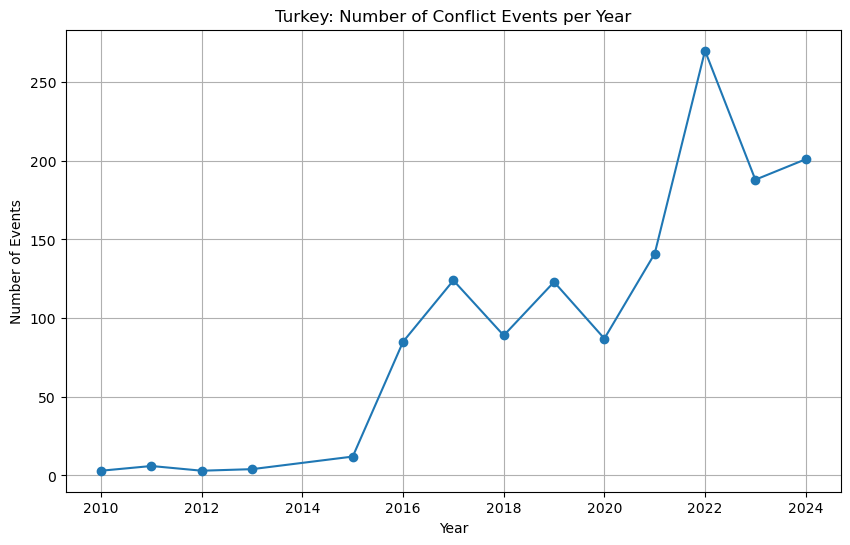

In [7]:
import matplotlib.pyplot as plt

# --- 1. Events per year ---
events_per_year = turkey_conflicts.groupby("year").size()

plt.figure(figsize=(10,6))
events_per_year.plot(kind="line", marker="o")
plt.title("Turkey: Number of Conflict Events per Year")
plt.xlabel("Year")
plt.ylabel("Number of Events")
plt.grid(True)
plt.show()


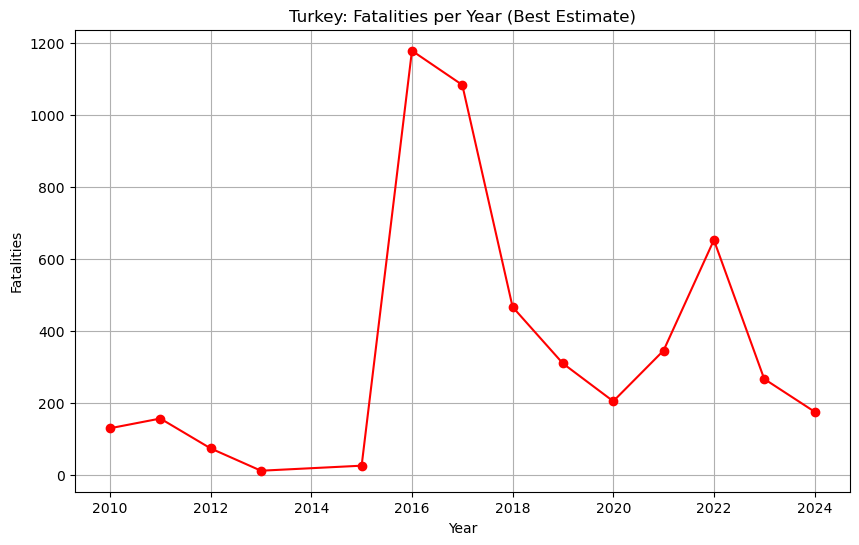

In [8]:

# --- 2. Fatalities per year (best estimates) ---
deaths_per_year = turkey_conflicts.groupby("year")["best"].sum()

plt.figure(figsize=(10,6))
deaths_per_year.plot(kind="line", marker="o", color="red")
plt.title("Turkey: Fatalities per Year (Best Estimate)")
plt.xlabel("Year")
plt.ylabel("Fatalities")
plt.grid(True)
plt.show()


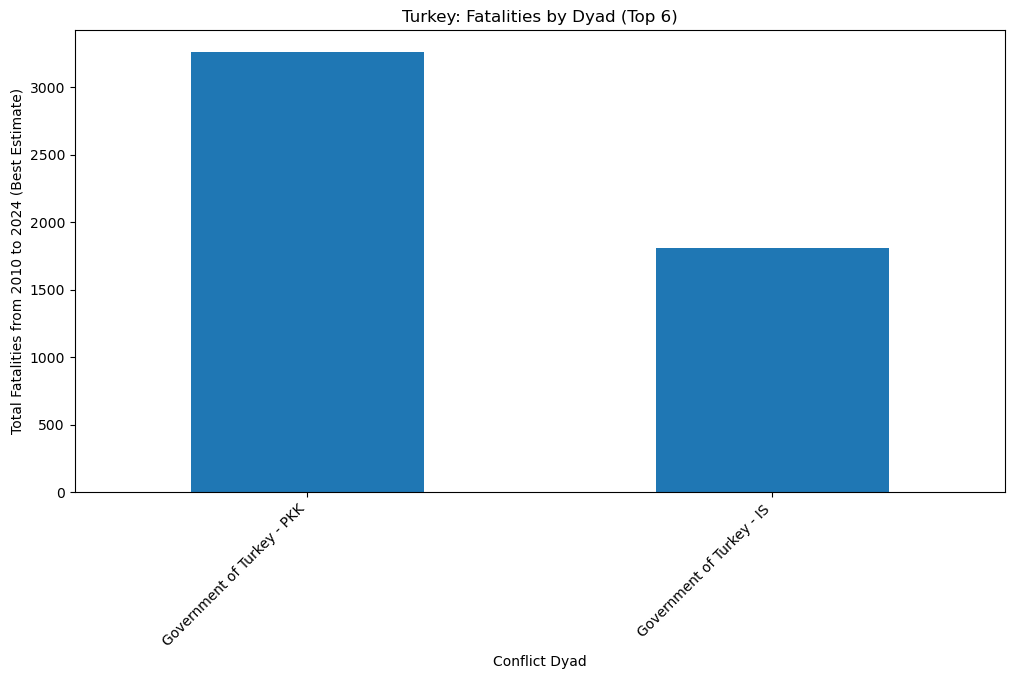

In [9]:


# --- 3. Fatalities by dyad (top 6) ---
dyad_summary = (
    turkey_conflicts.groupby("dyad_name")["best"]
    .sum()
    .sort_values(ascending=False)
    .head(6)
)

plt.figure(figsize=(12,6))
dyad_summary.plot(kind="bar")
plt.title("Turkey: Fatalities by Dyad (Top 6)")
plt.xlabel("Conflict Dyad")
plt.ylabel("Total Fatalities from 2010 to 2024 (Best Estimate)")
plt.xticks(rotation=45, ha="right")
plt.show()


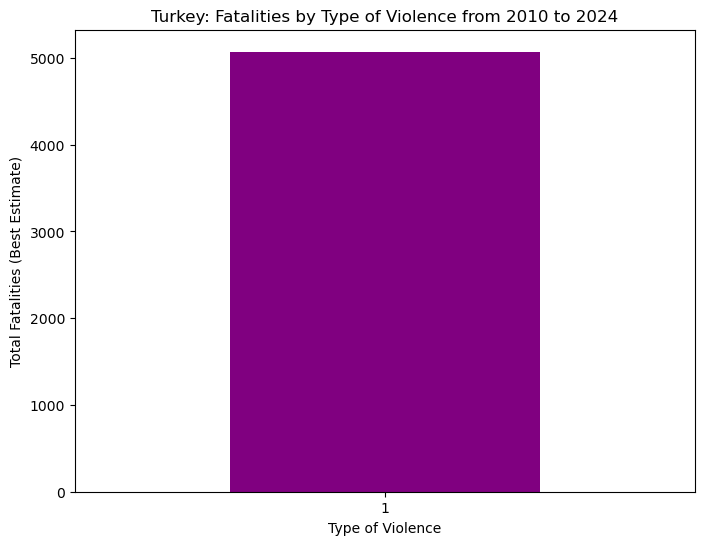

In [10]:
# --- 4. Fatalities by type of violence ---
violence_types = turkey_conflicts.groupby("type_of_violence")["best"].sum()

plt.figure(figsize=(8,6))
violence_types.plot(kind="bar", color="purple")
plt.title("Turkey: Fatalities by Type of Violence from 2010 to 2024")
plt.xlabel("Type of Violence")
plt.ylabel("Total Fatalities (Best Estimate)")
plt.xticks(rotation=0)
plt.show()


In [11]:
%pip install geopandas contextily shapely pyproj rtree

Note: you may need to restart the kernel to use updated packages.


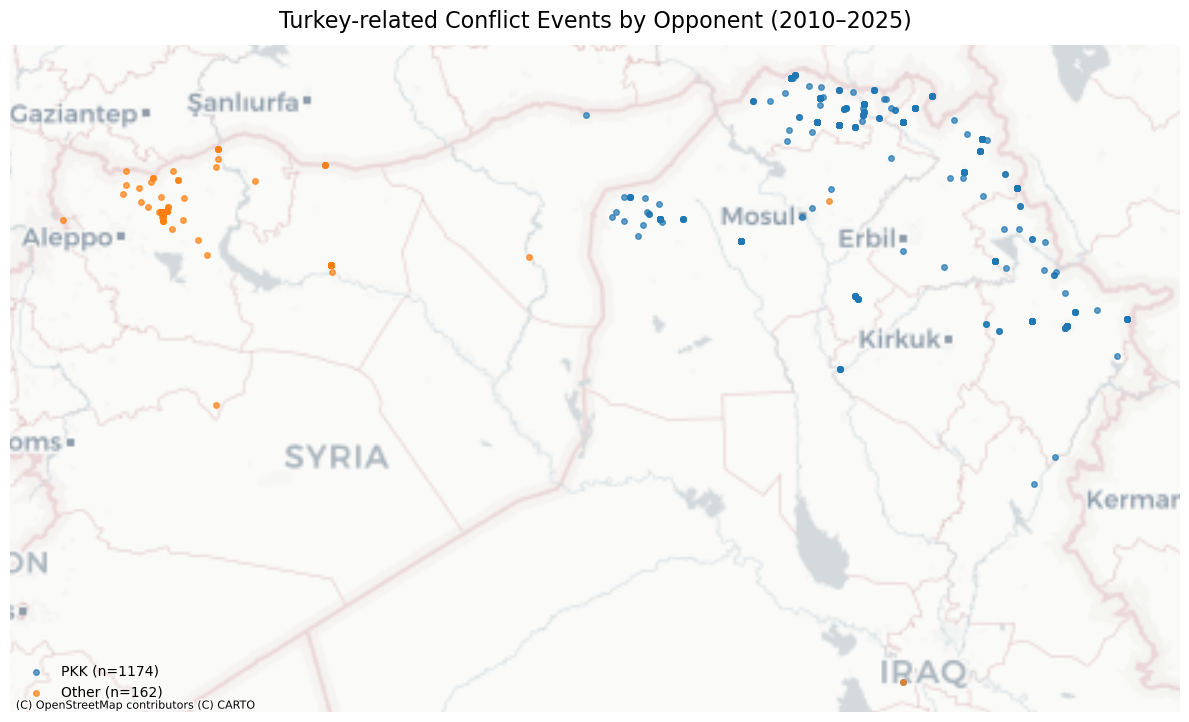

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx

df = turkey_conflicts.dropna(subset=["longitude","latitude"]).copy()

# Better opponent classifier
def classify_opponent(row):
    text = f"{row.get('dyad_name','')} {row.get('side_b','')}".lower()
    if " pkk" in text or text.endswith("pkk"):
        return "PKK"
    if " islamic state" in text or text.startswith("is ") or " is-" in text or text == "is":
        return "IS"
    if "sdf" in text or "pyd" in text or "ypg" in text:
        return "SDF/PYD"
    return "Other"

df["opponent"] = df.apply(classify_opponent, axis=1)

gdf = gpd.GeoDataFrame(
    df, geometry=[Point(xy) for xy in zip(df["longitude"], df["latitude"])], crs="EPSG:4326"
).to_crs(3857)

# Plot only categories that exist to avoid warnings
present = [c for c in ["PKK","IS","SDF/PYD","Other"] if (gdf["opponent"]==c).any()]

fig, ax = plt.subplots(figsize=(12,10))
for label in present:
    gdf[gdf["opponent"]==label].plot(ax=ax, markersize=16, alpha=0.7, label=f"{label} (n={(gdf['opponent']==label).sum()})")

# Basemap (switch to OSM if CartoDB is slow)
try:
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, zoom=6)
except Exception:
    world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")).to_crs(3857)
    world.boundary.plot(ax=ax, linewidth=0.6, alpha=0.7)
    world.plot(ax=ax, alpha=0.05, edgecolor="none")

ax.set_title("Turkey-related Conflict Events by Opponent (2010–2025)", fontsize=16, pad=12)
ax.set_axis_off()
ax.legend(frameon=False, loc="lower left", fontsize=10)
plt.tight_layout()
plt.show()


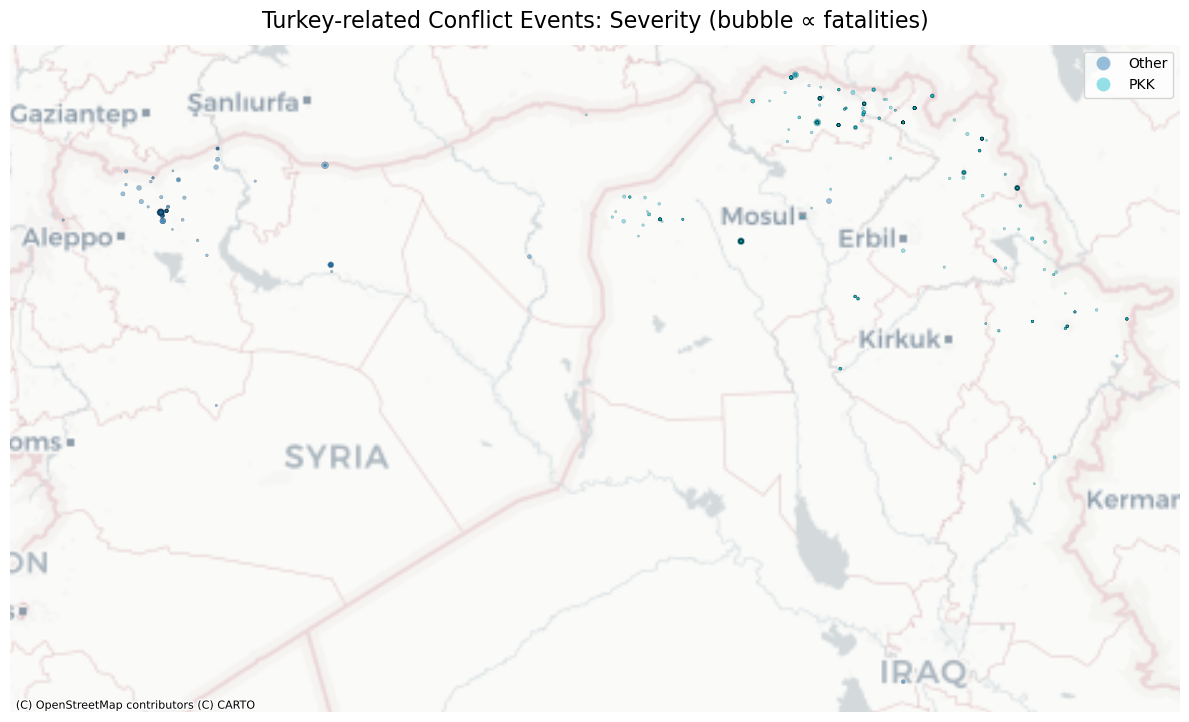

In [17]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx
import numpy as np

df = turkey_conflicts.dropna(subset=["longitude","latitude"]).copy()
df["best"] = pd.to_numeric(df["best"], errors="coerce").fillna(0)

# bucket
def cls(row):
    t = f"{row.get('dyad_name','')} {row.get('side_b','')}".lower()
    if " pkk" in t or t.endswith("pkk"): return "PKK"
    if " islamic state" in t or t.startswith("is ") or " is-" in t or t=="is": return "IS"
    if any(k in t for k in ["sdf","pyd","ypg"]): return "SDF/PYD"
    return "Other"
df["opponent"] = df.apply(cls, axis=1)

gdf = gpd.GeoDataFrame(df, geometry=[Point(xy) for xy in zip(df["longitude"], df["latitude"])], crs=4326).to_crs(3857)

# scale marker size (avoid zero)
size = np.sqrt(gdf["best"].clip(lower=1)) * 2.5

fig, ax = plt.subplots(figsize=(12,10))
gdf.plot(ax=ax, markersize=size, alpha=0.45, linewidth=0.2, edgecolor="k", column="opponent", legend=True)

try:
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, zoom=6)
except Exception:
    world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")).to_crs(3857)
    world.boundary.plot(ax=ax, linewidth=0.6, alpha=0.7)

ax.set_title("Turkey-related Conflict Events: Severity (bubble ∝ fatalities)", fontsize=16, pad=12)
ax.set_axis_off()
plt.tight_layout()
plt.show()


In [18]:
# Yearly count and fatalities
year_summary = (
    turkey_conflicts
      .assign(best=pd.to_numeric(turkey_conflicts["best"], errors="coerce").fillna(0))
      .groupby("year")
      .agg(events=("year","count"), fatalities=("best","sum"))
      .reset_index()
)
display(year_summary.tail(10))

# Opponent × year matrix
opp_year = (
    df.groupby(["year","opponent"])
      .size().unstack(fill_value=0)
      .sort_index()
)
display(opp_year.tail(10))

# Top locations by events
top_places = (
    df.groupby(["country","adm_1","adm_2"], dropna=False)
      .size().reset_index(name="events")
      .sort_values("events", ascending=False).head(15)
)
display(top_places)


,year,events,fatalities
4,2015,12,25
5,2016,85,1178
6,2017,124,1083
7,2018,89,466
8,2019,123,309
9,2020,87,204
10,2021,141,345
11,2022,270,652
12,2023,188,266
13,2024,201,175


opponent,Other,PKK
year,,
2015,2,10
2016,76,9
2017,84,40
2018,0,89
2019,0,123
2020,0,87
2021,0,141
2022,0,270
2023,0,188


,country,adm_1,adm_2,events
30,Iraq,NaN,NaN,493
8,Iraq,Dahūk province,Al ‘Amādīyah district,349
33,Syria,Aleppo governorate,Al Bab district,125
6,Iraq,Arbīl province,Soran district,88
10,Iraq,Dahūk province,Qaḑā’ Zākhū,64
11,Iraq,Dahūk province,NaN,51
19,Iraq,Nīnawá province,Sinjār district,39
40,Syria,NaN,NaN,17
28,Iraq,Sulaymānīyah province,Qaḑā’ Sulaymānīyah,17
4,Iraq,Arbīl province,Qaḑā’ Makhmūr,12


=== CHOW TESTS: EVENTS ===
2015: F=2.06, p=0.1732, n=15
2016: F=0.68, p=0.5264, n=15
2019: F=0.44, p=0.6563, n=15
2020: F=1.17, p=0.3463, n=15
2022: F=0.06, p=0.9460, n=15

=== CHOW TESTS: FATALITIES ===
2015: F=13.18, p=0.0012, n=15
2016: F=2.56, p=0.1224, n=15
2019: F=1.35, p=0.2985, n=15
2020: F=0.70, p=0.5165, n=15
2022: F=0.81, p=0.4680, n=15

Estimated change-points (events): [2020]
Estimated change-points (fatalities): [2015]


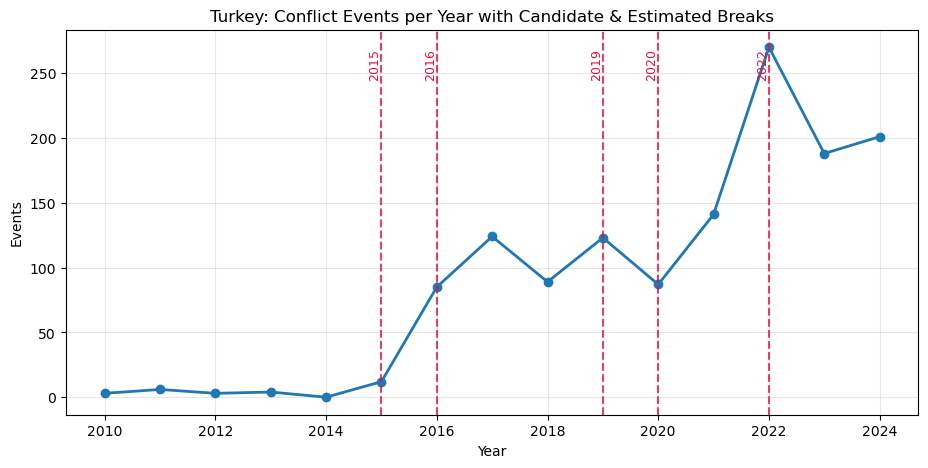

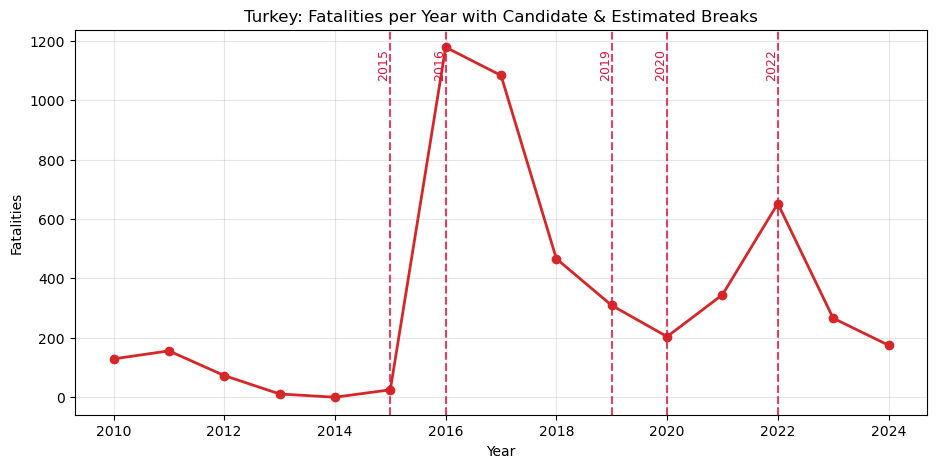

In [19]:
# --- Structural breaks & change-points on UCDP data for Turkey ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# If not already numeric
tc = turkey_conflicts.copy()
tc["year"] = pd.to_numeric(tc["year"], errors="coerce")
tc["best"] = pd.to_numeric(tc["best"], errors="coerce").fillna(0)

# 1) Build yearly series -------------------------------------------------------
events_per_year = tc.groupby("year").size().rename("events")
deaths_per_year = tc.groupby("year")["best"].sum().rename("fatalities")

# Ensure continuous yearly index
yr_index = pd.Index(range(int(tc["year"].min()), int(tc["year"].max())+1), name="year")
events_per_year = events_per_year.reindex(yr_index, fill_value=0)
deaths_per_year = deaths_per_year.reindex(yr_index, fill_value=0)

# 2) Simple Chow test implementation ------------------------------------------
# We test a mean/linear-trend break at a given year using OLS RSS comparison.
import statsmodels.api as sm

def chow_test(series: pd.Series, break_year: int, add_trend=True):
    """Return Chow test F-stat and p-value for a break at `break_year`.
    OLS model: y ~ const (+ t). Splits sample at break_year (inclusive left)."""
    s = series.dropna()
    t = np.arange(len(s)) + 1    # simple time trend
    X = np.column_stack([np.ones_like(t), t]) if add_trend else np.ones((len(t),1))

    # map break index within s.index
    if break_year not in s.index:
        raise ValueError(f"break_year {break_year} not in index range {int(s.index.min())}-{int(s.index.max())}")
    k = 2 if add_trend else 1    # number of params
    idx_break = np.where(s.index == break_year)[0][0]

    # whole-sample OLS
    model_full = sm.OLS(s.values, X).fit()
    RSS_full = np.sum(model_full.resid**2)

    # subsamples
    X1, y1 = X[:idx_break+1], s.values[:idx_break+1]
    X2, y2 = X[idx_break+1:], s.values[idx_break+1:]

    model1 = sm.OLS(y1, X1).fit()
    model2 = sm.OLS(y2, X2).fit()
    RSS_1 = np.sum(model1.resid**2)
    RSS_2 = np.sum(model2.resid**2)

    n = len(s)
    # Chow F-statistic
    F = ((RSS_full - (RSS_1 + RSS_2)) / k) / ((RSS_1 + RSS_2) / (n - 2*k))
    from scipy.stats import f as f_dist
    pval = 1 - f_dist.cdf(F, dfn=k, dfd=(n - 2*k))
    return {"F": float(F), "p": float(pval), "n": int(n), "k": int(k)}

# Years you care about (edit as needed)
candidate_breaks = [2015, 2016, 2019, 2020, 2022]

print("=== CHOW TESTS: EVENTS ===")
for y in candidate_breaks:
    try:
        out = chow_test(events_per_year, y, add_trend=True)
        print(f"{y}: F={out['F']:.2f}, p={out['p']:.4f}, n={out['n']}")
    except ValueError as e:
        print(f"{y}: {e}")

print("\n=== CHOW TESTS: FATALITIES ===")
for y in candidate_breaks:
    try:
        out = chow_test(deaths_per_year, y, add_trend=True)
        print(f"{y}: F={out['F']:.2f}, p={out['p']:.4f}, n={out['n']}")
    except ValueError as e:
        print(f"{y}: {e}")

# 3) Multiple change-points (Bai–Perron style via 'ruptures') -----------------
# If ruptures is not installed, uncomment the next two lines:
# import sys, subprocess
# subprocess.check_call([sys.executable, "-m", "pip", "install", "ruptures"])

import ruptures as rpt

def find_changes(series: pd.Series, pen="bic", max_bkps=5):
    """Return change-point indices (in integer positions) for piecewise-constant mean."""
    y = series.values.astype(float)
    algo = rpt.Pelt(model="l2").fit(y)
    # Use BIC-like penalty if pen='bic', else numeric penalty (e.g., pen=10)
    if isinstance(pen, str) and pen.lower() == "bic":
        # crude BIC penalty scaled by variance and log(n)
        sigma2 = np.var(y)
        penalty = np.log(len(y)) * sigma2
    else:
        penalty = pen
    bkps = algo.predict(pen=penalty)
    # 'bkps' returns segment end indices (1-based); remove final len(y)
    return [b for b in bkps if b < len(y)]

# Detect breaks
events_bk = find_changes(events_per_year, pen="bic", max_bkps=5)
deaths_bk = find_changes(deaths_per_year, pen="bic", max_bkps=5)

# Map indices to calendar years
events_bk_years = [int(events_per_year.index[i]) for i in events_bk]
deaths_bk_years = [int(deaths_per_year.index[i]) for i in deaths_bk]

print("\nEstimated change-points (events):", events_bk_years)
print("Estimated change-points (fatalities):", deaths_bk_years)

# 4) Plot with detected break lines -------------------------------------------
def plot_with_breaks(series: pd.Series, break_years, title, color="tab:blue"):
    fig, ax = plt.subplots(figsize=(11,5))
    ax.plot(series.index, series.values, marker="o", color=color, linewidth=2)
    for by in break_years:
        ax.axvline(by, color="crimson", linestyle="--", alpha=0.8)
        ax.text(by, ax.get_ylim()[1]*0.95, str(by), color="crimson", rotation=90,
                ha="right", va="top", fontsize=9)
    ax.set_title(title)
    ax.set_xlabel("Year")
    ax.set_ylabel(series.name.capitalize())
    ax.grid(True, alpha=0.3)
    plt.show()

plot_with_breaks(events_per_year, sorted(set(candidate_breaks) | set(events_bk_years)),
                 "Turkey: Conflict Events per Year with Candidate & Estimated Breaks")
plot_with_breaks(deaths_per_year, sorted(set(candidate_breaks) | set(deaths_bk_years)),
                 "Turkey: Fatalities per Year with Candidate & Estimated Breaks", color="tab:red")


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt

# If you don't already have these two Series, (re)build them here:
events_per_year = turkey_conflicts.groupby("year").size().reindex(range(2010, 2025), fill_value=0)
fatalities_per_year = (
    pd.to_numeric(turkey_conflicts["best"], errors="coerce").fillna(0)
    .groupby(turkey_conflicts["year"]).sum()
    .reindex(range(2010, 2025), fill_value=0)
)

# Small helper to run & plot multiple breaks
def detect_breaks(series: pd.Series, title: str, pen=10, model="rbf", min_size=1):
    """
    series: pd.Series indexed by year (monotonic)
    pen: penalty (↑ fewer breaks; ↓ more breaks)
    model: 'rbf' handles non-linear mean/variance shifts well; try 'l2' for piecewise constant mean
    min_size: minimum segment length (in observations)
    """
    y = series.values.reshape(-1, 1)
    algo = rpt.Pelt(model=model, min_size=min_size).fit(y)
    # You can also use rpt.Binseg(model=model).fit(y) if you prefer binary segmentation
    bkpts_idx = algo.predict(pen=pen)            # indices AFTER the last obs in each segment
    # Translate indices to years (drop the final endpoint which is len(series))
    years = series.index
    break_years = [int(years[i-1]) for i in bkpts_idx[:-1]]

    # Plot time series with vertical break lines
    fig, ax = plt.subplots(figsize=(10, 5))
    series.plot(ax=ax, marker="o")
    for by in break_years:
        ax.axvline(by, color="crimson", linestyle="--", alpha=0.7)
        ax.text(by + 0.05, series.max()*0.95, str(by), rotation=90, color="crimson", va="top")
    ax.set_title(f"{title} — Multiple Breaks (ruptures, pen={pen}, model='{model}')")
    ax.set_xlabel("Year"); ax.set_ylabel(series.name or "Value")
    ax.grid(True)
    plt.show()

    print(f"Estimated break years → {break_years}")
    return break_years


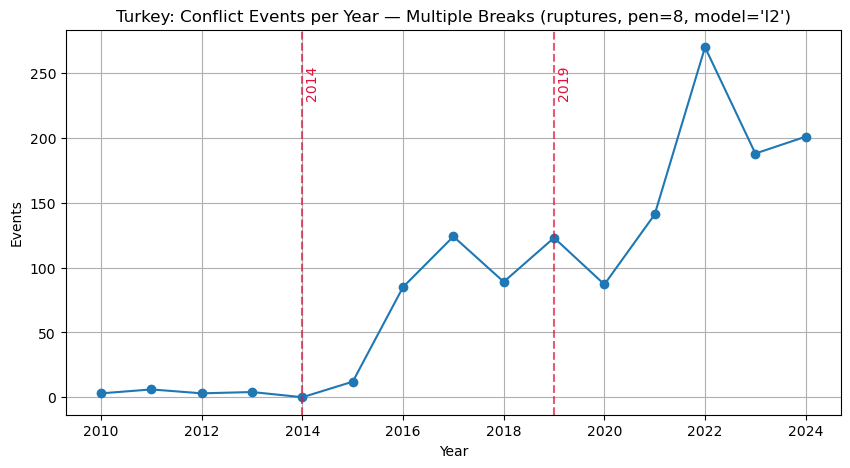

Estimated break years → [2014, 2019]


In [21]:
breaks_events = detect_breaks(
    events_per_year.rename("Events"),
    title="Turkey: Conflict Events per Year",
    pen=8,           # try 6–14 to see stability
    model="l2",      # events often piecewise-constant mean shifts
    min_size=2       # avoid silly 1-year segments
)


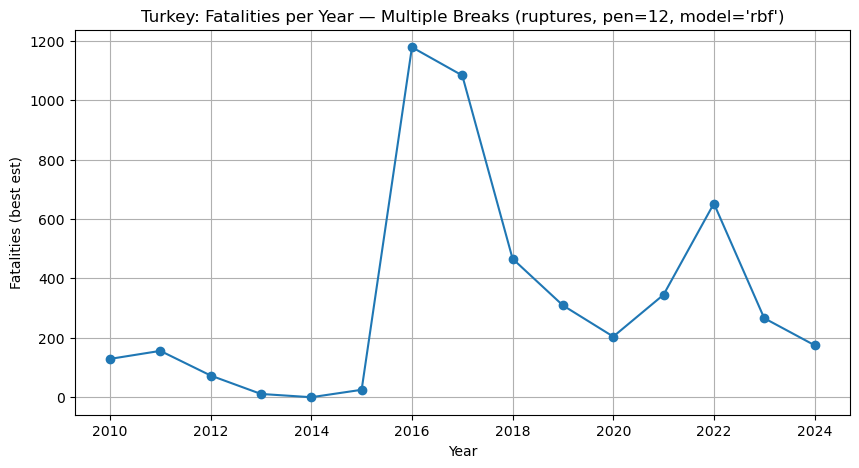

Estimated break years → []


In [22]:
breaks_fatalities = detect_breaks(
    fatalities_per_year.rename("Fatalities (best est)"),
    title="Turkey: Fatalities per Year",
    pen=12,          # fatalities are spikier; a slightly higher penalty is sensible
    model="rbf",     # allows mean/variance shifts; often better for fatalities
    min_size=2
)


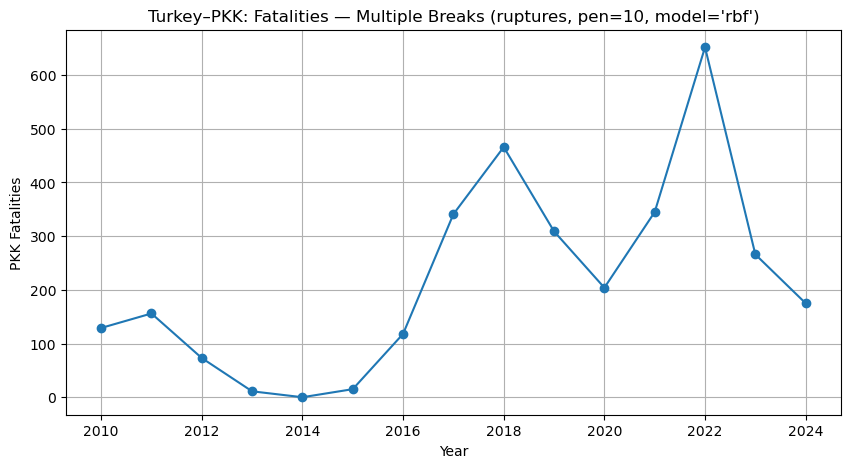

Estimated break years → []


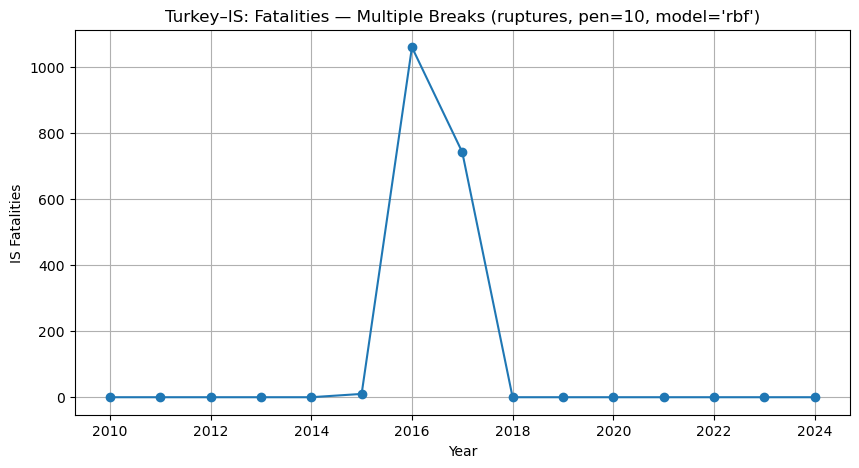

Estimated break years → []


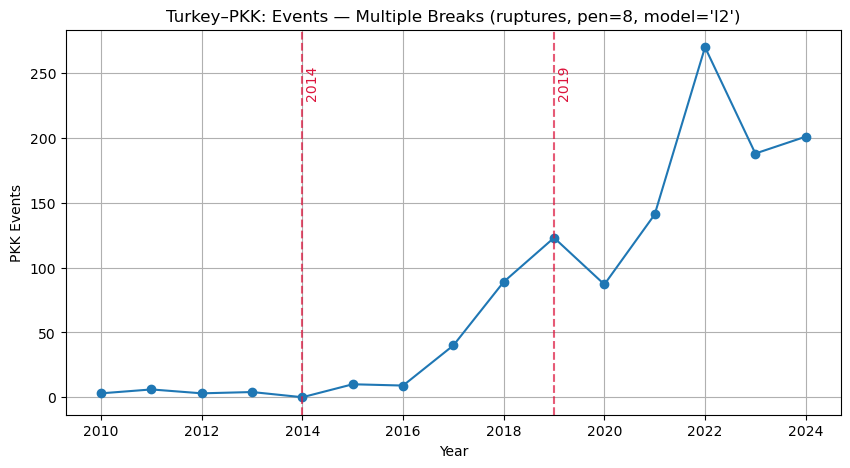

Estimated break years → [2014, 2019]


[2014, 2019]

In [23]:
def series_by_dyad(dyad_substring: str, value="best"):
    df = turkey_conflicts[turkey_conflicts["dyad_name"].str.contains(dyad_substring, na=False)]
    if value == "events":
        s = df.groupby("year").size()
    else:
        s = pd.to_numeric(df["best"], errors="coerce").fillna(0).groupby(df["year"]).sum()
    return s.reindex(range(2010, 2025), fill_value=0)

# PKK fatalities
pkk_fatal = series_by_dyad("Government of Turkey - PKK", value="best").rename("PKK Fatalities")
detect_breaks(pkk_fatal, "Turkey–PKK: Fatalities", pen=10, model="rbf", min_size=2)

# IS fatalities
is_fatal = series_by_dyad("Government of Turkey - IS", value="best").rename("IS Fatalities")
detect_breaks(is_fatal, "Turkey–IS: Fatalities", pen=10, model="rbf", min_size=2)

# PKK events (count)
pkk_events = series_by_dyad("Government of Turkey - PKK", value="events").rename("PKK Events")
detect_breaks(pkk_events, "Turkey–PKK: Events", pen=8, model="l2", min_size=2)


Top ADM1 by fatalities: Aleppo governorate


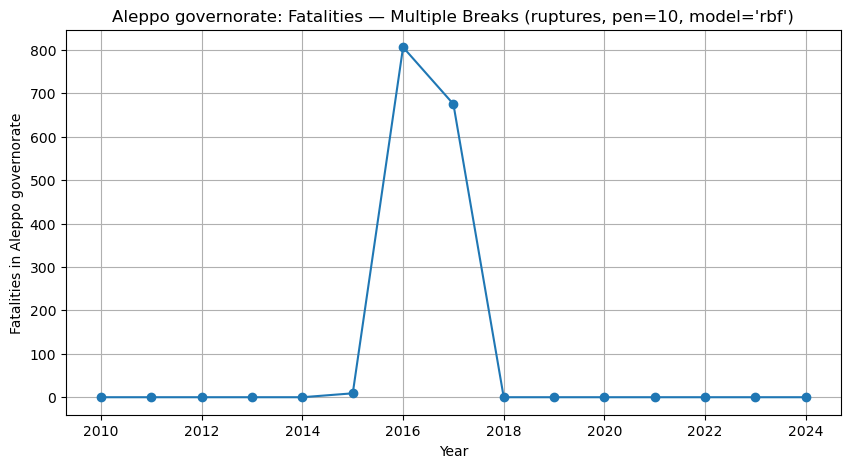

Estimated break years → []


[]

In [24]:
# Top ADM1 by cumulative fatalities
adm1_fatal = (
    pd.to_numeric(turkey_conflicts["best"], errors="coerce").fillna(0)
      .groupby([turkey_conflicts["adm_1"], turkey_conflicts["year"]]).sum()
      .reset_index()
)
top_adm1 = (adm1_fatal.groupby("adm_1")["best"].sum().sort_values(ascending=False).index[0])
print("Top ADM1 by fatalities:", top_adm1)

adm1_series = (adm1_fatal[adm1_fatal["adm_1"] == top_adm1]
               .set_index("year")["best"]
               .reindex(range(2010, 2025), fill_value=0)
               .rename(f"Fatalities in {top_adm1}"))
detect_breaks(adm1_series, f"{top_adm1}: Fatalities", pen=10, model="rbf", min_size=2)



=== Robustness: EVENTS (penalty sweep, model='l2') ===

--- pen=6 ---


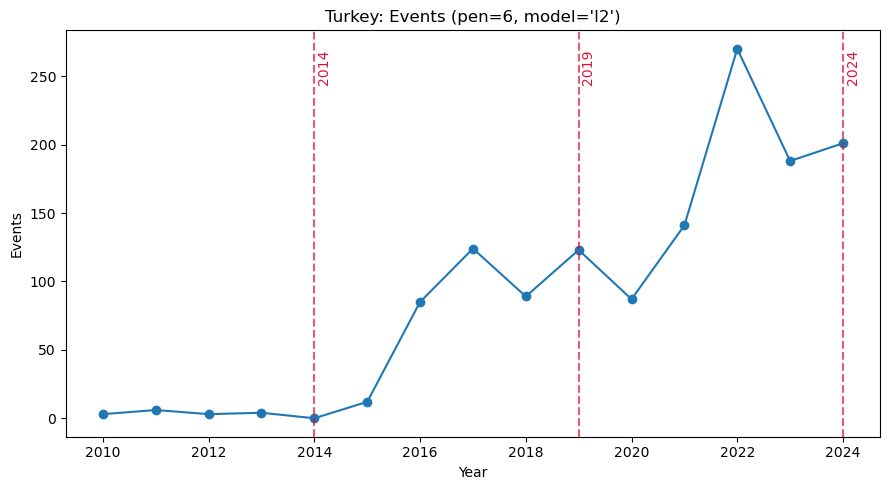

Estimated break years ➜ [2014, 2019, 2024]

--- pen=8 ---


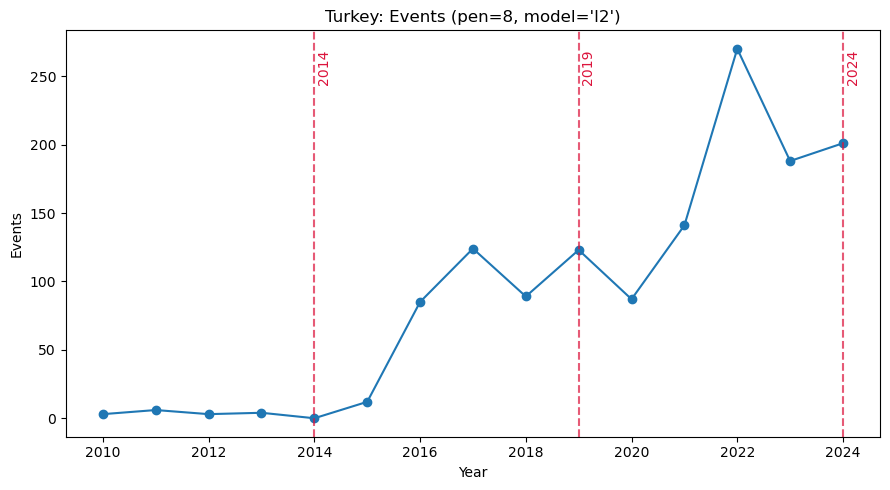

Estimated break years ➜ [2014, 2019, 2024]

--- pen=10 ---


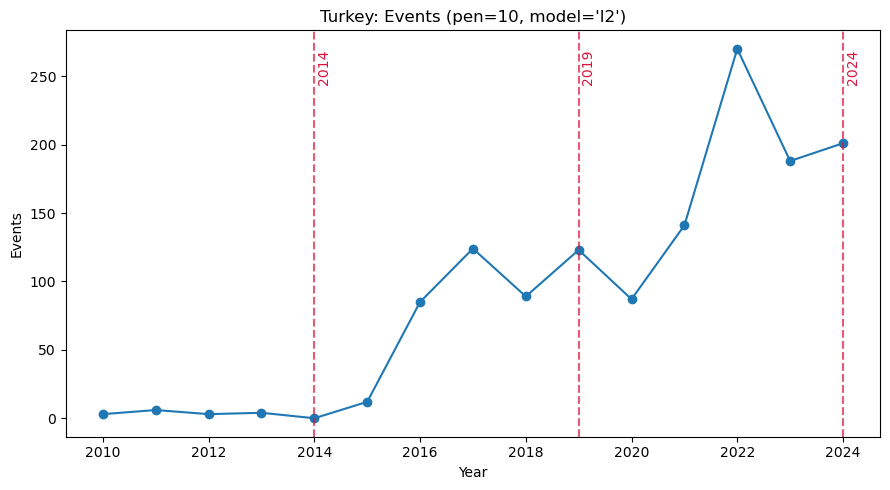

Estimated break years ➜ [2014, 2019, 2024]

--- pen=12 ---


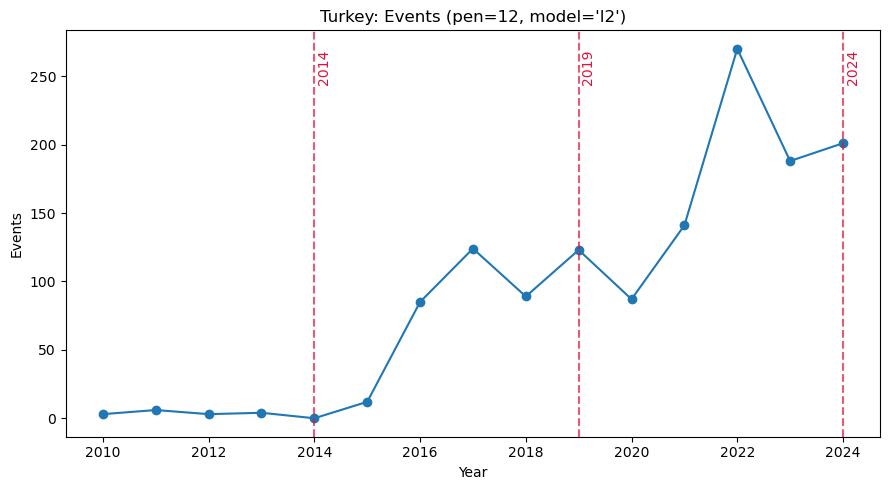

Estimated break years ➜ [2014, 2019, 2024]

--- pen=14 ---


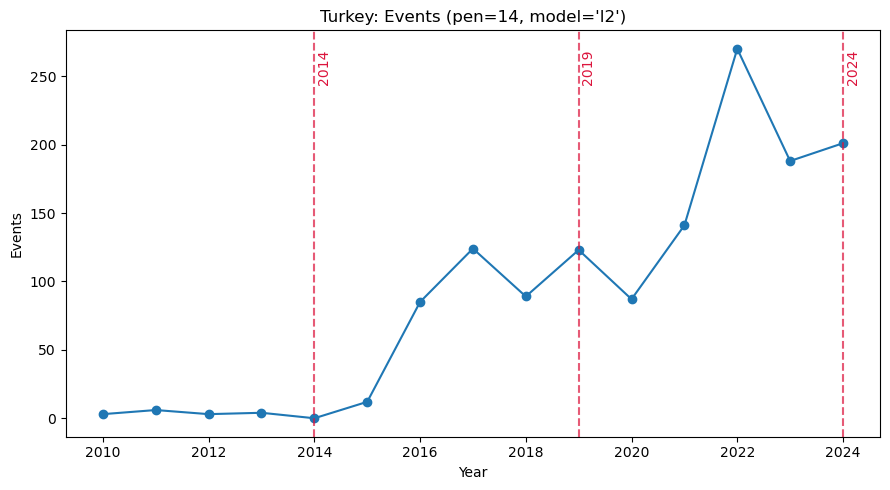

Estimated break years ➜ [2014, 2019, 2024]

=== Robustness: FATALITIES (try l2 and rbf) ===


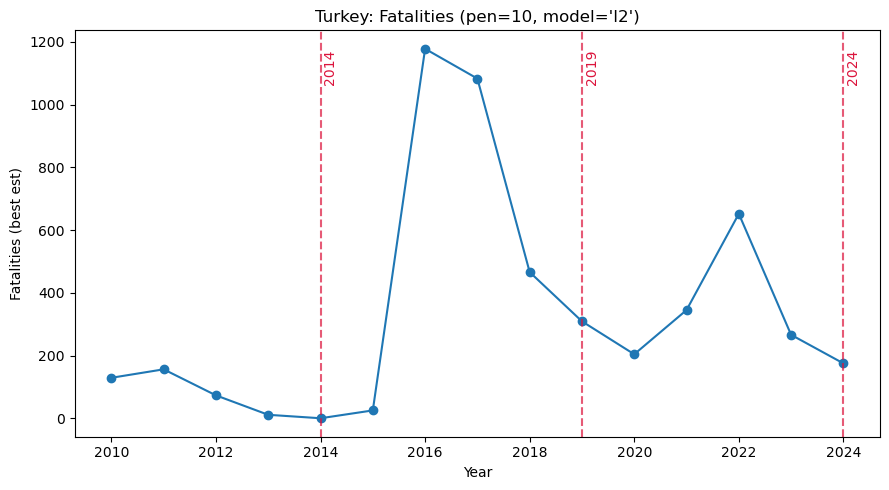

Estimated break years ➜ [2014, 2019, 2024]


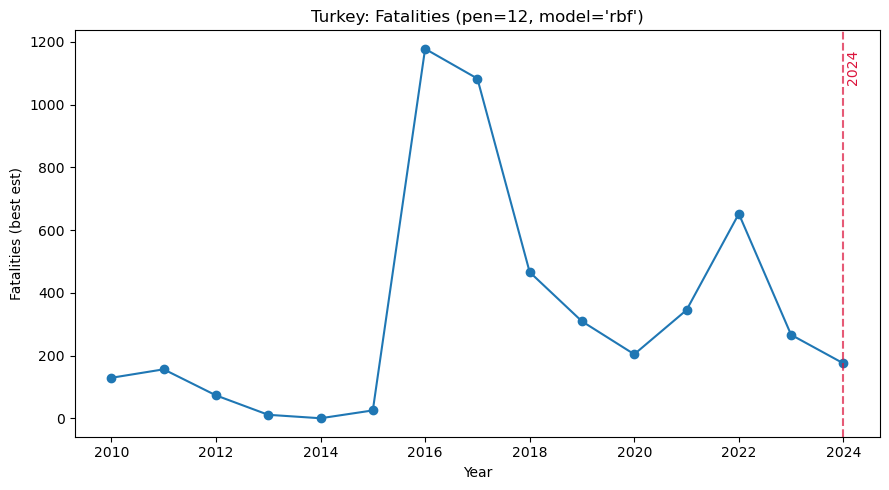

Estimated break years ➜ [2024]

=== Bootstrap CIs: EVENTS ===
Estimated break years ➜ [2014, 2019, 2024]
Estimated break years ➜ [2014, 2019, 2024]
Estimated break years ➜ [2014, 2019, 2024]
Estimated break years ➜ [2014, 2019, 2024]
Estimated break years ➜ [2014, 2024]
Estimated break years ➜ [2014, 2019, 2024]
Estimated break years ➜ [2014, 2019, 2024]
Estimated break years ➜ [2014, 2019, 2024]
Estimated break years ➜ [2014, 2019, 2024]
Estimated break years ➜ [2014, 2019, 2024]
Estimated break years ➜ [2014, 2019, 2024]
Estimated break years ➜ [2014, 2019, 2024]
Estimated break years ➜ [2014, 2019, 2024]
Estimated break years ➜ [2014, 2024]
Estimated break years ➜ [2014, 2019, 2024]
Estimated break years ➜ [2014, 2019, 2024]
Estimated break years ➜ [2014, 2019, 2024]
Estimated break years ➜ [2014, 2019, 2024]
Estimated break years ➜ [2014, 2019, 2024]
Estimated break years ➜ [2014, 2019, 2024]
Estimated break years ➜ [2014, 2019, 2024]
Estimated break years ➜ [2014, 2019, 2024]
Esti

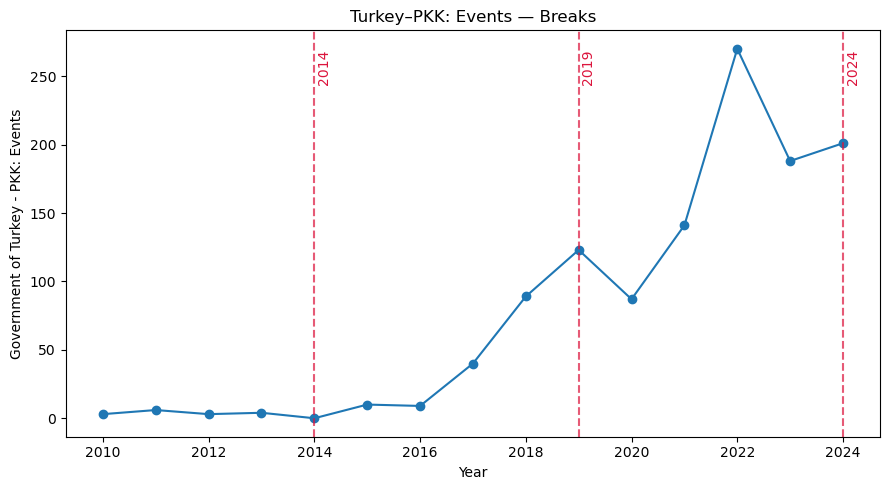

Estimated break years ➜ [2014, 2019, 2024]

=== PKK: Fatalities (pen=10, rbf) ===


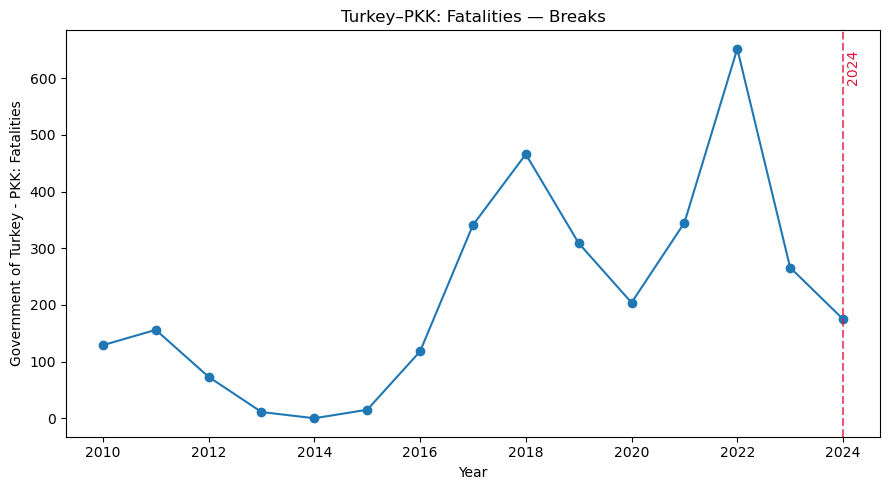

Estimated break years ➜ [2024]

=== IS: Fatalities (pen=10, rbf) ===


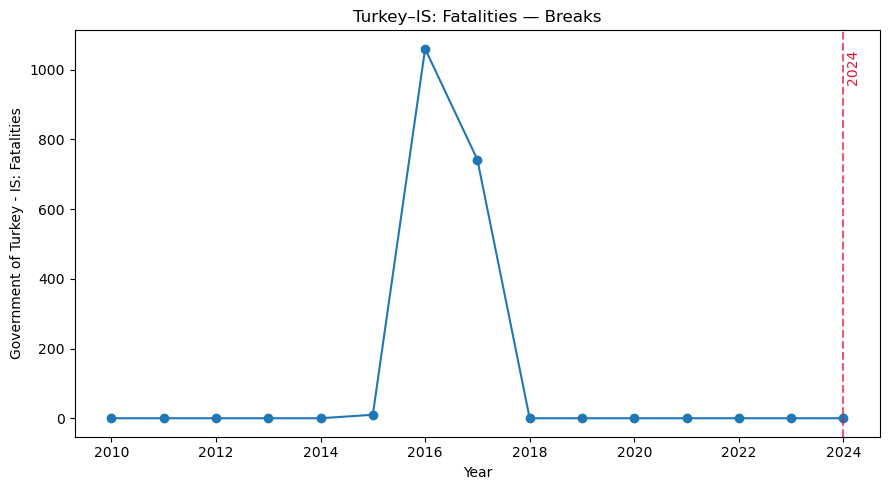

Estimated break years ➜ [2024]

=== Notes to interpret ===
* Look for break years that appear across multiple penalties/models.
* Compare EVENTS and FATALITIES: spikes in 2015–2016 (collapse of peace talks/coup year?)
* Do dyad-specific series (PKK/IS) align with aggregate breaks?
* Use bootstrap CI ranges when you narrate (e.g., 'break centered on 2015, CI 2014–2016').


In [25]:
# ===============================
# Structural Breaks – Robustness + CIs
# (Drop this whole cell after your existing break-detection section)
# ===============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt

# --------- Helpers ---------
def _to_yearly(series_like, name):
    """Ensure a Int64Index 2010..2024 with zeros for missing years."""
    s = pd.Series(series_like, name=name)
    s.index = s.index.astype(int)
    s = s.sort_index().reindex(range(2010, 2025), fill_value=0)
    return s

def yearly_events(df):
    return _to_yearly(df.groupby("year").size(), "Events")

def yearly_fatalities(df, col="best"):
    vals = pd.to_numeric(df[col], errors="coerce").fillna(0)
    return _to_yearly(vals.groupby(df["year"]).sum(), "Fatalities (best est)")

def detect_breaks_series(series, pen=8, model="l2", min_size=2, title=None, plot=True):
    """
    Run ruptures PELT on a 1D yearly series and (optionally) plot.
    Returns list of break years (e.g., [2014, 2019]).
    """
    y = series.values.astype(float)
    algo = rpt.Pelt(model=model, min_size=min_size).fit(y)
    # penalty can be tuned; higher => fewer breaks
    idx = algo.predict(pen=pen)
    # idx are end indices (1-based). Convert to break YEARS (exclude final endpoint)
    break_years = [int(series.index[i-1]) for i in idx if i < len(series)+1]

    if plot:
        fig, ax = plt.subplots(figsize=(9,5))
        ax.plot(series.index, y, marker="o")
        ax.set_title(title or f"{series.name} — Multiple Breaks (pen={pen}, model='{model}')")
        ax.set_xlabel("Year"); ax.set_ylabel(series.name)
        for by in break_years:
            ax.axvline(by, color="crimson", ls="--", lw=1.5, alpha=0.7)
            ax.text(by+0.05, ax.get_ylim()[1]*0.95, str(by), rotation=90, color="crimson", va="top")
        plt.tight_layout()
        plt.show()

    print("Estimated break years ➜", break_years)
    return break_years

def bootstrap_breaks(series, n_boot=300, pen=8, model="l2", min_size=2, random_state=42):
    """
    Simple bootstrap over years: resample yearly values with replacement,
    detect breaks each time, and summarize the distribution of break years.
    """
    rng = np.random.default_rng(random_state)
    years = series.index.values
    vals  = series.values.astype(float)

    all_breaks = []
    for _ in range(n_boot):
        # resample years with replacement (keeping length constant)
        idx = rng.integers(0, len(vals), size=len(vals))
        sample = pd.Series(vals[idx], index=years).sort_index()
        bs_breaks = detect_breaks_series(
            _to_yearly(sample, series.name), pen=pen, model=model, min_size=min_size, plot=False
        )
        all_breaks.extend(bs_breaks)

    if len(all_breaks) == 0:
        return {"counts": {}, "ci90": (None, None), "all": []}

    # summarize
    counts = pd.Series(all_breaks).value_counts().sort_index()
    ci_low, ci_high = np.percentile(all_breaks, [5, 95])
    print("\nBootstrap summary")
    print("-----------------")
    print("Break-year frequency (top):")
    print(counts.head(10))
    print(f"90% bootstrap CI (year): ({int(ci_low)} , {int(ci_high)})")
    return {"counts": counts, "ci90": (int(ci_low), int(ci_high)), "all": all_breaks}

def segment_summary(series, break_years):
    """
    Compute mean level within each segment defined by break_years.
    """
    years = series.index.to_list()
    cuts = sorted([y for y in break_years if years[0] <= y <= years[-1]])
    bounds = [years[0]-1] + cuts + [years[-1]]
    rows = []
    for a, b in zip(bounds[:-1], bounds[1:]):
        # segment is (a, b] in years
        seg = series[(series.index > a) & (series.index <= b)]
        rows.append({"segment": f"{a+1}-{b}", "mean": float(seg.mean()), "sum": float(seg.sum()), "n_years": len(seg)})
    out = pd.DataFrame(rows)
    print("\nSegment means/sums")
    print(out.to_string(index=False))
    return out

def series_by_dyad(df, dyad_substring, value="best"):
    """Build yearly series for a dyad filter."""
    dff = df[df["dyad_name"].str.contains(dyad_substring, na=False)]
    if value == "events":
        s = dff.groupby("year").size()
        return _to_yearly(s, f"{dyad_substring}: Events")
    else:
        vals = pd.to_numeric(dff["best"], errors="coerce").fillna(0)
        s = vals.groupby(dff["year"]).sum()
        return _to_yearly(s, f"{dyad_substring}: Fatalities")

# --------- Build yearly series (robust to re-runs) ---------
events_per_year     = yearly_events(turkey_conflicts)
fatalities_per_year = yearly_fatalities(turkey_conflicts)

# --------- 1) Robustness: different penalties/models ---------
print("\n=== Robustness: EVENTS (penalty sweep, model='l2') ===")
events_breaks_by_pen = {}
for pen in [6, 8, 10, 12, 14]:
    print(f"\n--- pen={pen} ---")
    by = detect_breaks_series(events_per_year, pen=pen, model="l2",
                              min_size=2, title=f"Turkey: Events (pen={pen}, model='l2')", plot=True)
    events_breaks_by_pen[pen] = by

print("\n=== Robustness: FATALITIES (try l2 and rbf) ===")
fat_breaks_l2  = detect_breaks_series(fatalities_per_year, pen=10, model="l2",
                                      min_size=2, title="Turkey: Fatalities (pen=10, model='l2')", plot=True)
fat_breaks_rbf = detect_breaks_series(fatalities_per_year, pen=12, model="rbf",
                                      min_size=2, title="Turkey: Fatalities (pen=12, model='rbf')", plot=True)

# --------- 2) Bootstrap CIs for break years ---------
print("\n=== Bootstrap CIs: EVENTS ===")
events_boot = bootstrap_breaks(events_per_year, n_boot=300, pen=8, model="l2", min_size=2)

print("\n=== Bootstrap CIs: FATALITIES (model='rbf') ===")
fat_boot = bootstrap_breaks(fatalities_per_year, n_boot=300, pen=12, model="rbf", min_size=2)

# --------- 3) Segment-level summaries ---------
print("\n=== Segment summary: EVENTS (using pen=8 results if available) ===")
ev_breaks_ref = events_breaks_by_pen.get(8, [])
ev_seg = segment_summary(events_per_year, ev_breaks_ref)

print("\n=== Segment summary: FATALITIES (using model='rbf', pen=12 results) ===")
fat_seg = segment_summary(fatalities_per_year, fat_breaks_rbf)

# --------- 4) (Optional) Dyad-level checks: PKK & IS ---------
try:
    pkk_events = series_by_dyad(turkey_conflicts, "Government of Turkey - PKK", value="events")
    pkk_fatal  = series_by_dyad(turkey_conflicts, "Government of Turkey - PKK", value="best")
    is_fatal   = series_by_dyad(turkey_conflicts, "Government of Turkey - IS",  value="best")

    print("\n=== PKK: Events (pen=8, l2) ===")
    pkk_ev_breaks = detect_breaks_series(pkk_events, pen=8, model="l2", min_size=2,
                                         title="Turkey–PKK: Events — Breaks", plot=True)

    print("\n=== PKK: Fatalities (pen=10, rbf) ===")
    pkk_fat_breaks = detect_breaks_series(pkk_fatal, pen=10, model="rbf", min_size=2,
                                          title="Turkey–PKK: Fatalities — Breaks", plot=True)

    print("\n=== IS: Fatalities (pen=10, rbf) ===")
    is_fat_breaks = detect_breaks_series(is_fatal, pen=10, model="rbf", min_size=2,
                                         title="Turkey–IS: Fatalities — Breaks", plot=True)
except Exception as e:
    print("\n[Dyad-level optional block skipped]", e)

# --------- 5) Quick textual cues to guide write-up ---------
print("\n=== Notes to interpret ===")
print("* Look for break years that appear across multiple penalties/models.")
print("* Compare EVENTS and FATALITIES: spikes in 2015–2016 (collapse of peace talks/coup year?)")
print("* Do dyad-specific series (PKK/IS) align with aggregate breaks?")
print("* Use bootstrap CI ranges when you narrate (e.g., 'break centered on 2015, CI 2014–2016').")


C:\Users\gurde\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


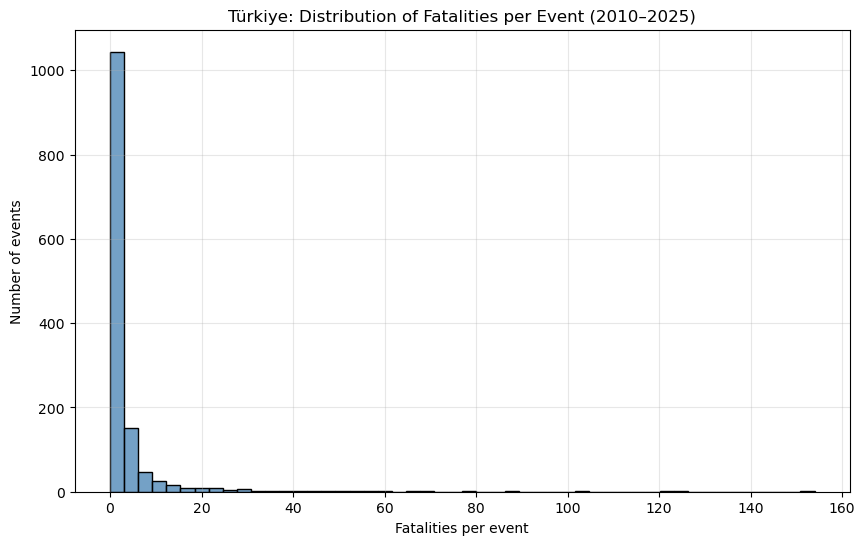

C:\Users\gurde\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


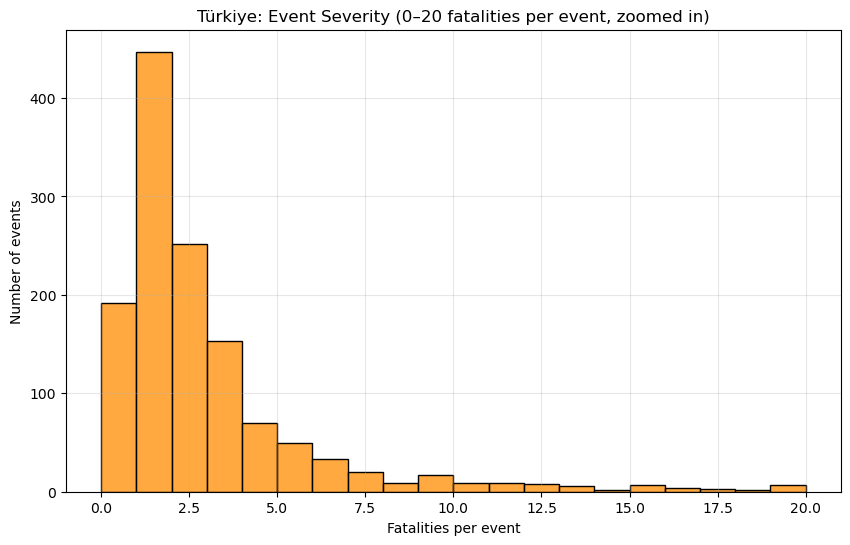

C:\Users\gurde\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


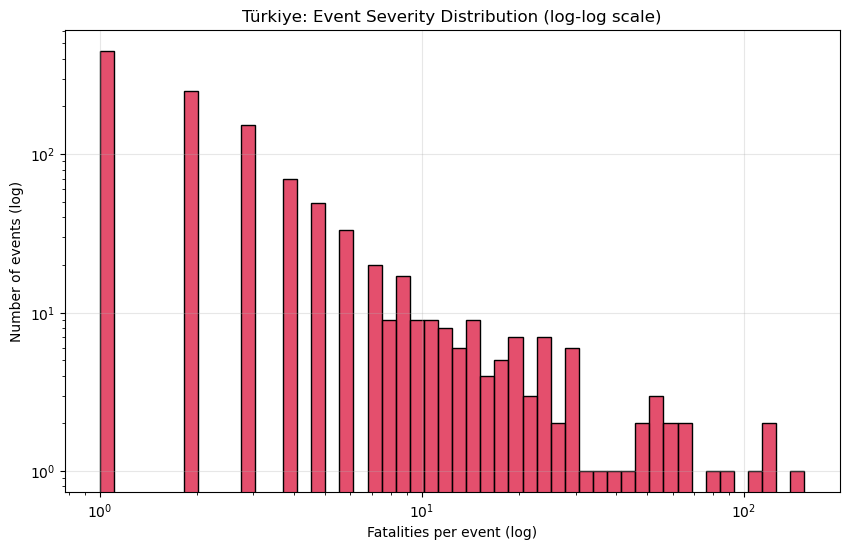


Descriptive stats of event severity:
count    1336.000000
mean        3.796407
std         9.757456
min         0.000000
50%         2.000000
90%         7.000000
95%        13.000000
99%        47.300000
max       154.000000
Name: best, dtype: float64


In [26]:
# ===============================
# Event Severity Distributions
# ===============================
import seaborn as sns

# Ensure fatalities column is numeric
fatalities = pd.to_numeric(turkey_conflicts["best"], errors="coerce").fillna(0)

plt.figure(figsize=(10,6))
sns.histplot(fatalities, bins=50, kde=False, color="steelblue")
plt.title("Türkiye: Distribution of Fatalities per Event (2010–2025)")
plt.xlabel("Fatalities per event")
plt.ylabel("Number of events")
plt.grid(True, alpha=0.3)
plt.show()

# --- Zoom on lower end (0–20 fatalities) ---
plt.figure(figsize=(10,6))
sns.histplot(fatalities[fatalities <= 20], bins=20, kde=False, color="darkorange")
plt.title("Türkiye: Event Severity (0–20 fatalities per event, zoomed in)")
plt.xlabel("Fatalities per event")
plt.ylabel("Number of events")
plt.grid(True, alpha=0.3)
plt.show()

# --- Log scale version to reveal heavy tail ---
plt.figure(figsize=(10,6))
sns.histplot(fatalities[fatalities > 0], bins=50, kde=False, color="crimson", log_scale=(True, True))
plt.title("Türkiye: Event Severity Distribution (log-log scale)")
plt.xlabel("Fatalities per event (log)")
plt.ylabel("Number of events (log)")
plt.grid(True, alpha=0.3)
plt.show()

# --- Quick descriptive stats ---
print("\nDescriptive stats of event severity:")
print(fatalities.describe(percentiles=[0.5, 0.9, 0.95, 0.99]))


C:\Users\gurde\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gurde\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


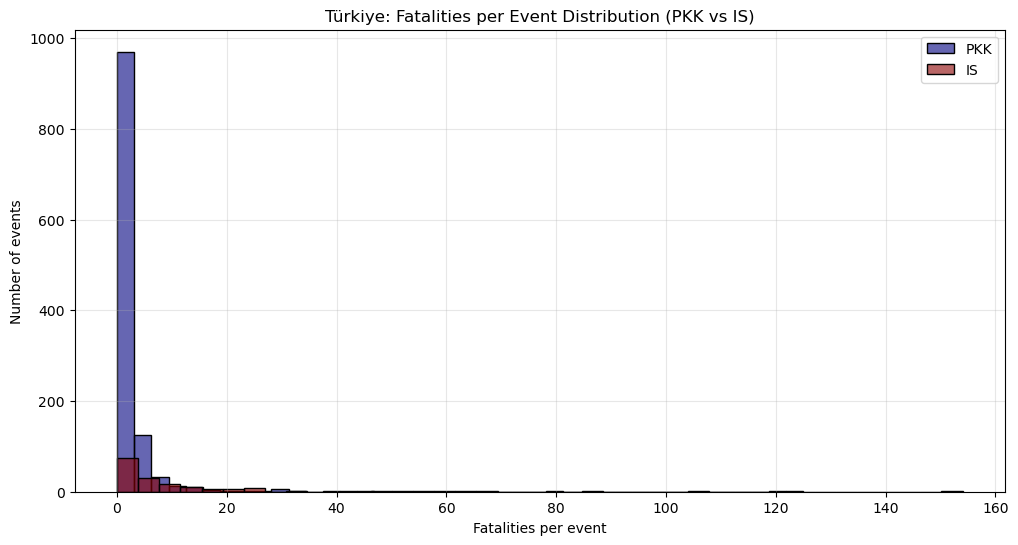

C:\Users\gurde\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gurde\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


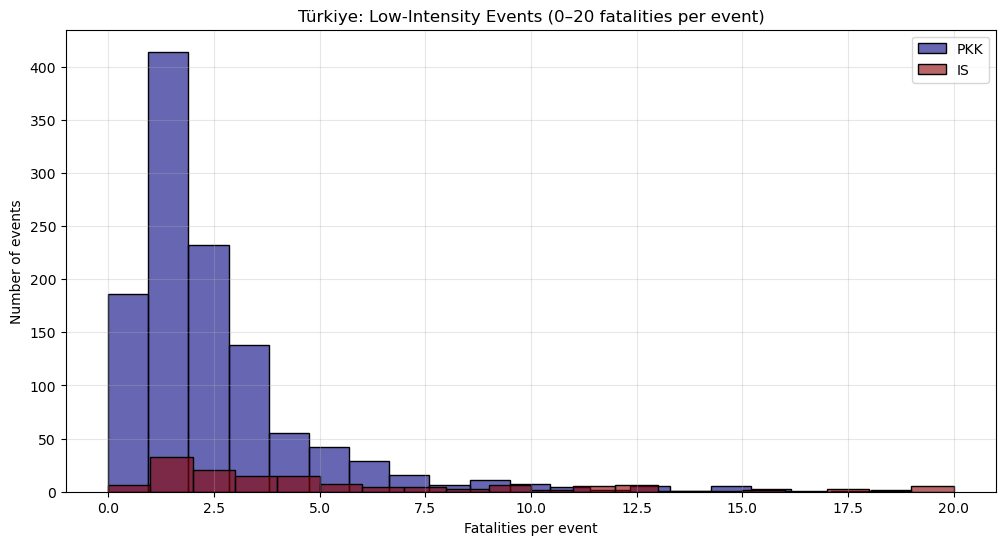

C:\Users\gurde\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gurde\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


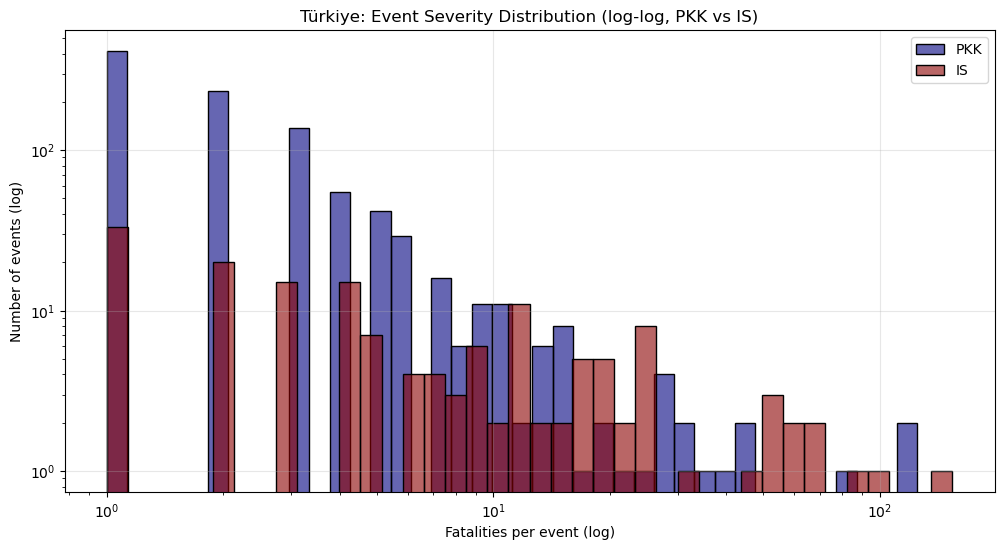

PKK Event Fatalities Summary:
count    1174.000000
mean        2.776831
std         6.751182
min         0.000000
50%         1.000000
90%         5.000000
95%         8.000000
99%        28.270000
max       125.000000
Name: fatalities, dtype: float64

IS Event Fatalities Summary:
count    162.000000
mean      11.185185
std       19.871395
min        0.000000
50%        4.000000
90%       24.000000
95%       54.800000
99%       94.240000
max      154.000000
Name: fatalities, dtype: float64


In [27]:
# ===============================
# Event Severity Distributions by Opponent (PKK vs IS)
# ===============================

# Make sure fatalities are numeric
turkey_conflicts["fatalities"] = pd.to_numeric(turkey_conflicts["best"], errors="coerce").fillna(0)

# Subset PKK and IS
pkk_events = turkey_conflicts[turkey_conflicts["dyad_name"].str.contains("PKK", na=False)]
is_events  = turkey_conflicts[turkey_conflicts["dyad_name"].str.contains("IS", na=False)]

# Plot histogram comparison (linear scale)
plt.figure(figsize=(12,6))
sns.histplot(pkk_events["fatalities"], bins=40, color="navy", label="PKK", alpha=0.6)
sns.histplot(is_events["fatalities"], bins=40, color="darkred", label="IS", alpha=0.6)
plt.title("Türkiye: Fatalities per Event Distribution (PKK vs IS)")
plt.xlabel("Fatalities per event")
plt.ylabel("Number of events")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# --- Zoom-in: low-fatality events (0–20 deaths) ---
plt.figure(figsize=(12,6))
sns.histplot(pkk_events[pkk_events["fatalities"] <= 20]["fatalities"], bins=20, color="navy", label="PKK", alpha=0.6)
sns.histplot(is_events[is_events["fatalities"] <= 20]["fatalities"], bins=20, color="darkred", label="IS", alpha=0.6)
plt.title("Türkiye: Low-Intensity Events (0–20 fatalities per event)")
plt.xlabel("Fatalities per event")
plt.ylabel("Number of events")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# --- Log-log plot for heavy-tail comparison ---
plt.figure(figsize=(12,6))
sns.histplot(pkk_events[pkk_events["fatalities"] > 0]["fatalities"], bins=40, color="navy", label="PKK", alpha=0.6, log_scale=(True, True))
sns.histplot(is_events[is_events["fatalities"] > 0]["fatalities"], bins=40, color="darkred", label="IS", alpha=0.6, log_scale=(True, True))
plt.title("Türkiye: Event Severity Distribution (log-log, PKK vs IS)")
plt.xlabel("Fatalities per event (log)")
plt.ylabel("Number of events (log)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# --- Descriptive stats ---
print("PKK Event Fatalities Summary:")
print(pkk_events["fatalities"].describe(percentiles=[0.5, 0.9, 0.95, 0.99]))
print("\nIS Event Fatalities Summary:")
print(is_events["fatalities"].describe(percentiles=[0.5, 0.9, 0.95, 0.99]))


Top 15 actors by events-weighted centrality:


,network,actor,degree_centrality,betweenness,eigenvector,pagerank,strength
0,events,Turkey: Government,1.0,1.0,0.707107,0.486486,1336.0
1,events,PKK,0.5,0.0,0.700469,0.413372,1174.0
2,events,IS,0.5,0.0,0.096658,0.100142,162.0



Top 15 actors by fatalities-weighted centrality:


,network,actor,degree_centrality,betweenness,eigenvector,pagerank,strength
0,fatalities,Turkey: Government,1.0,1.0,0.707107,0.486486,5072.0
1,fatalities,PKK,0.5,0.0,0.618051,0.315784,3260.0
2,fatalities,IS,0.5,0.0,0.343530,0.197730,1812.0



Türkiye-linked actors (events):


,network,actor,degree_centrality,betweenness,eigenvector,pagerank,strength
0,events,Turkey: Government,1.0,1.0,0.707107,0.486486,1336.0



Türkiye-linked actors (fatalities):


,network,actor,degree_centrality,betweenness,eigenvector,pagerank,strength
0,fatalities,Turkey: Government,1.0,1.0,0.707107,0.486486,5072.0


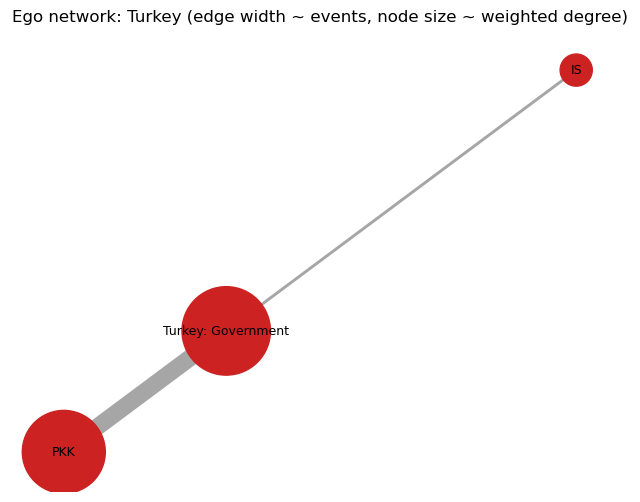

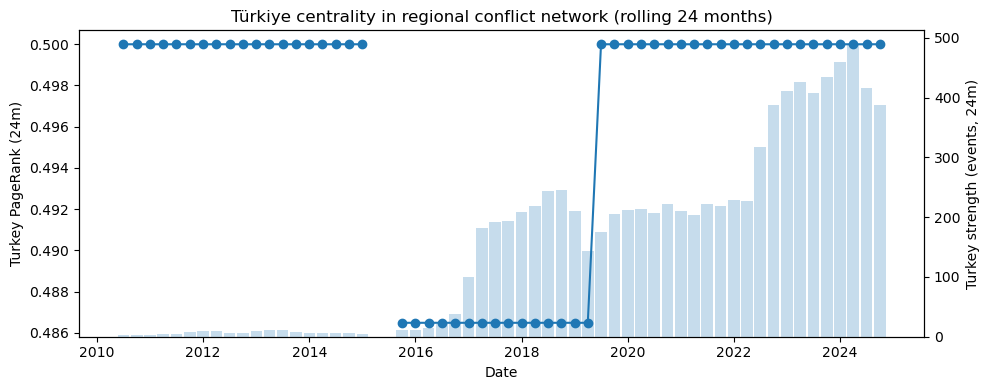

In [29]:
# ================================
# Dyadic Network & Centrality (Mechanism 2)
# ================================
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# --- 0) Start from your filtered events ---
df0 = turkey_conflicts.copy()

# --- 1) Normalise actor names (light-touch; extend as needed) ---
def norm(x: str) -> str:
    if pd.isna(x): 
        return x
    x = str(x).strip()
    repl = {
        "Government of Turkey": "Turkey: Government",
        "Government of Syria": "Syria: Government",
        "Government of Iraq": "Iraq: Government",
        "Government of United States of America": "USA: Government",
        "Islamic State": "IS", "ISIS": "IS", "ISIL": "IS", "Daesh": "IS",
        "YPG": "SDF", "YPJ": "SDF"
    }
    return repl.get(x, x)

for col in ["side_a","side_b","dyad_name","conflict_name"]:
    if col in df0.columns:
        df0[col] = df0[col].astype(str).apply(norm)

# --- 2) Tag Türkiye-aligned proxies (edit/extend this list to your coding) ---
tr_proxies = {
    "SNA": True, "National Front for Liberation": True, "Hamza Division": True,
    "Liwa al-Sultan Murad": True, "Ahrar al-Sharqiya": True, "Faylaq al-Sham": True,
    "Jaysh al Nasr": True, "23rd Division": True, "Sham Legion": True,
    # include with caution depending on your criteria:
    "Ahrar al-Sham": True
}

def collapse_proxy(name):
    if pd.isna(name): 
        return name
    return f"Türkiye-aligned: {name}" if name in tr_proxies else name

for col in ["side_a","side_b"]:
    df0[col] = df0[col].apply(collapse_proxy)

# --- 3) Regional scope: build the graph from Turkey/Syria/Iraq theatres ---
df0["country"] = df0["country"].astype(str)
dfR = df0[df0["country"].isin(["Turkey","Syria","Iraq"])].copy()

# Parse dates (needed for rolling network)
dfR["date_start"] = pd.to_datetime(dfR["date_start"], errors="coerce")

# Event weight proxy: each row is an event => weight=1
dfR["event_weight"] = 1.0

# Fatality weight
dfR["best"] = pd.to_numeric(dfR["best"], errors="coerce").fillna(0.0)

# --- 4) Helpers to build weighted graph and summarise centrality ---
def build_weighted_graph(frame, wcol, min_weight=1.0):
    G = nx.Graph()
    f = frame.dropna(subset=["side_a","side_b"]).copy()
    for _, r in f.iterrows():
        a, b = r["side_a"], r["side_b"]
        w = float(r[wcol])
        if w <= 0: 
            continue
        if G.has_edge(a,b):
            G[a][b]["weight"] += w
        else:
            G.add_edge(a,b, weight=w)
    # prune tiny edges and isolates
    drop_edges = [(u,v) for u,v,d in G.edges(data=True) if d["weight"] < min_weight]
    G.remove_edges_from(drop_edges)
    G.remove_nodes_from(list(nx.isolates(G)))
    return G

def centrality_table(G, label):
    if G.number_of_nodes() == 0:
        return pd.DataFrame(columns=["network","actor","degree_centrality","betweenness","eigenvector","pagerank","strength"])
    deg = nx.degree_centrality(G)
    btw = nx.betweenness_centrality(G, normalized=True, weight=None)
    eig = nx.eigenvector_centrality_numpy(G, weight="weight") if G.number_of_nodes() > 1 else {n:1.0 for n in G}
    pr  = nx.pagerank(G, weight="weight")
    strength = dict(G.degree(weight="weight"))
    tab = pd.DataFrame({
        "network": label,
        "actor": list(G.nodes()),
        "degree_centrality": [deg[n] for n in G],
        "betweenness": [btw[n] for n in G],
        "eigenvector": [eig[n] for n in G],
        "pagerank": [pr[n] for n in G],
        "strength": [strength[n] for n in G]
    }).sort_values(["pagerank","strength"], ascending=False, ignore_index=True)
    return tab

# --- 5) Build two graphs: events-weighted and fatalities-weighted ---
G_events = build_weighted_graph(dfR, wcol="event_weight", min_weight=1.0)
G_fatal  = build_weighted_graph(dfR, wcol="best",         min_weight=5.0)  # drop trivial fatality ties

tab_events = centrality_table(G_events, "events")
tab_fatal  = centrality_table(G_fatal,  "fatalities")

print("Top 15 actors by events-weighted centrality:")
display(tab_events.head(15))
print("\nTop 15 actors by fatalities-weighted centrality:")
display(tab_fatal.head(15))

# Highlight Turkey and Türkiye-aligned actors
mask_tr = tab_events["actor"].str.contains("Turkey: Government|Türkiye-aligned", regex=True, na=False)
print("\nTürkiye-linked actors (events):")
display(tab_events[mask_tr])

mask_tr_f = tab_fatal["actor"].str.contains("Turkey: Government|Türkiye-aligned", regex=True, na=False)
print("\nTürkiye-linked actors (fatalities):")
display(tab_fatal[mask_tr_f])

# --- 6) Ego network plot for Turkey (events graph) ---
target = "Turkey: Government"
if target in G_events:
    eg = nx.ego_graph(G_events, target, radius=1)
    # sizes by weighted degree; edges by weight
    node_strength = dict(eg.degree(weight="weight"))
    sizes = [50 + 3*node_strength[n] for n in eg.nodes()]
    widths = [0.5 + 0.01*d["weight"] for _,_,d in eg.edges(data=True)]

    pos = nx.spring_layout(eg, k=0.8, seed=7, weight="weight")
    plt.figure(figsize=(8,6))
    nx.draw_networkx_edges(eg, pos, alpha=0.35, width=widths)
    nx.draw_networkx_nodes(eg, pos, node_size=sizes, node_color="#c22")
    nx.draw_networkx_labels(eg, pos, font_size=9)
    plt.title("Ego network: Turkey (edge width ~ events, node size ~ weighted degree)")
    plt.axis("off")
    plt.show()
else:
    print("'Turkey: Government' not present in events graph; ego-plot skipped.")

# --- 7) Rolling 24-month centrality for Turkey (events graph) ---
def centrality_rolling(series_df, months=24):
    dates = pd.date_range(series_df["date_start"].min(), series_df["date_start"].max(), freq="QS")
    pr_vals, str_vals = [], []
    for t in dates:
        win = series_df[(series_df["date_start"] > t - pd.DateOffset(months=months)) &
                        (series_df["date_start"] <= t)]
        G = build_weighted_graph(win, wcol="event_weight", min_weight=1.0)
        if target in G:
            pr = nx.pagerank(G, weight="weight").get(target, np.nan)
            strength = dict(G.degree(weight="weight")).get(target, 0.0)
        else:
            pr, strength = np.nan, 0.0
        pr_vals.append(pr); str_vals.append(strength)
    return dates, np.array(pr_vals), np.array(str_vals)

dfR_t = dfR.dropna(subset=["date_start"]).sort_values("date_start")
dates, pr24, str24 = centrality_rolling(dfR_t, months=24)

fig, ax1 = plt.subplots(figsize=(10,4))
ax1.plot(dates, pr24, marker="o")
ax1.set_ylabel("Turkey PageRank (24m)")
ax1.set_xlabel("Date")
ax1.set_title("Türkiye centrality in regional conflict network (rolling 24 months)")

ax2 = ax1.twinx()
ax2.bar(dates, str24, width=80, alpha=0.25)
ax2.set_ylabel("Turkey strength (events, 24m)")
plt.tight_layout()
plt.show()

# --- 8) (Optional) Export tables for appendix ---
# tab_events.to_csv("network_centrality_events.csv", index=False)
# tab_fatal.to_csv("network_centrality_fatalities.csv", index=False)


Top 15 actors by events-weighted centrality:


,actor,degree_centrality,betweenness,eigenvector,pagerank,strength
0,Government of Syria,0.030675,0.000000,0.706942,0.138928,75165.0
1,Syrian insurgents,0.012270,0.000000,0.702877,0.106384,66534.0
2,IS,0.417178,0.536620,0.072783,0.143651,21629.0
3,SDF,0.073620,0.235325,0.005385,0.037058,5601.0
4,Civilians,0.073620,0.201015,0.029115,0.026168,5421.0
5,Government of Iraq,0.018405,0.009771,0.004642,0.025783,4285.0
6,Government of Turkey,0.042945,0.048095,0.000206,0.020267,2836.0
7,PKK,0.012270,0.000000,0.000019,0.016881,2637.0
8,SNA,0.006135,0.000000,0.000064,0.005335,786.0
9,Government of Libya,0.055215,0.099523,0.000159,0.018818,741.0



Top 15 actors by fatalities-weighted centrality:


,actor,degree_centrality,betweenness,eigenvector,pagerank,strength
0,Government of Syria,0.030864,0.000000,0.706417,0.126843,347858.0
1,Syrian insurgents,0.012346,0.000000,0.694845,0.090670,288332.0
2,IS,0.413580,0.543823,0.127932,0.162315,166781.0
3,Government of Iraq,0.018519,0.009815,0.022876,0.045171,52645.0
4,Civilians,0.074074,0.272678,0.034158,0.024865,30944.0
5,SDF,0.074074,0.313626,0.009989,0.030103,28376.0
6,Government of Turkey,0.043210,0.048309,0.000825,0.017580,10621.0
7,Government of Libya,0.055556,0.094165,0.000888,0.020591,8961.0
8,PKK,0.012346,0.000000,0.000030,0.012550,8296.0
9,Forces of the House of Representatives,0.043210,0.029216,0.000290,0.015977,5737.0



Türkiye-linked actor in events network:


,actor,degree_centrality,betweenness,eigenvector,pagerank,strength
6,Government of Turkey,0.042945,0.048095,0.000206,0.020267,2836.0



Türkiye-linked actor in fatalities network:


,actor,degree_centrality,betweenness,eigenvector,pagerank,strength
6,Government of Turkey,0.04321,0.048309,0.000825,0.01758,10621.0


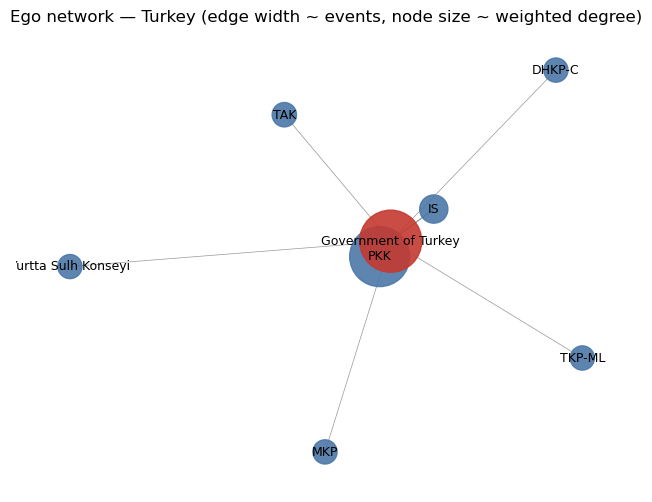

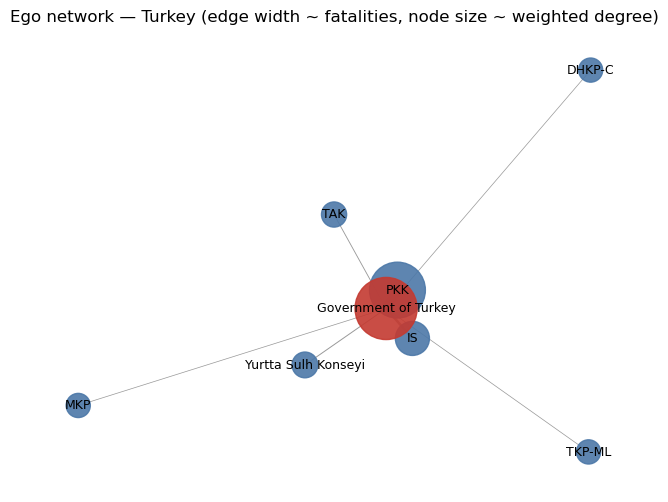

In [34]:
# ============================
# Regional Network Centrality
# ============================

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# --- Load from your pre-saved extended CSV ---
df = pd.read_csv(
    "GEDEvent_v25_1_extended.csv",
    parse_dates=["date_start","date_end"]
)

# ------------------------
# 0) PARAMETERS
# ------------------------
REGION_COUNTRIES = ["Turkey", "Syria", "Iraq", "Iran", "Libya"]
YEAR_MIN, YEAR_MAX = 2010, 2025
TURKEY_NODE = "Government of Turkey"   # adjust if label differs in your dyads

# ------------------------
# 1) FILTER & CLEAN
# ------------------------
dfR = (
    df.copy()
      .assign(
          country=lambda d: d["country"].astype(str).str.strip().replace({"Türkiye":"Turkey"}),
          side_a=lambda d: d["side_a"].astype(str).str.strip(),
          side_b=lambda d: d["side_b"].astype(str).str.strip(),
          best   =lambda d: pd.to_numeric(d["best"], errors="coerce"),
          year   =lambda d: pd.to_numeric(d["year"], errors="coerce"),
          date_start=lambda d: pd.to_datetime(d["date_start"], errors="coerce")
      )
)

dfR = dfR.loc[
    dfR["country"].isin(REGION_COUNTRIES) &
    dfR["year"].between(YEAR_MIN, YEAR_MAX)
].dropna(subset=["side_a","side_b","date_start"])

# ------------------------
# 2) BUILD WEIGHTED GRAPHS
# ------------------------
agg = (
    dfR.groupby(["side_a","side_b"], dropna=False)
        .agg(weight_events=("dyad_name","size"),
             weight_fatalities=("best","sum"))
        .reset_index()
)

def make_graph(weight_col: str) -> nx.Graph:
    G = nx.Graph()
    for _, r in agg.iterrows():
        a, b, w = r["side_a"], r["side_b"], float(r[weight_col] or 0.0)
        if a and b and w > 0:
            if G.has_edge(a,b):
                G[a][b]["weight"] += w
            else:
                G.add_edge(a, b, weight=w)
    return G

G_events      = make_graph("weight_events")
G_fatalities  = make_graph("weight_fatalities")

# ------------------------
# 3) CENTRALITY METRICS
# ------------------------
def centrality_table(G: nx.Graph, weight_col="weight") -> pd.DataFrame:
    if G.number_of_nodes() == 0:
        return pd.DataFrame(columns=["actor","degree_centrality","betweenness","eigenvector","pagerank","strength"])
    deg_c = nx.degree_centrality(G)
    btw   = nx.betweenness_centrality(G, weight=weight_col, normalized=True)
    try:
        eig = nx.eigenvector_centrality_numpy(G, weight=weight_col)
    except Exception:
        eig = {n:0.0 for n in G.nodes()}
    try:
        PR  = nx.pagerank(G.to_directed(), weight=weight_col)
    except Exception:
        PR  = {n:0.0 for n in G.nodes()}
    strength = {n: sum(d.get("weight",1.0) for *_ , d in G.edges(n, data=True)) for n in G.nodes()}
    dfc = pd.DataFrame({
        "actor": list(G.nodes()),
        "degree_centrality": [deg_c.get(n,0.0) for n in G.nodes()],
        "betweenness":       [btw.get(n,0.0)   for n in G.nodes()],
        "eigenvector":       [eig.get(n,0.0)   for n in G.nodes()],
        "pagerank":          [PR.get(n,0.0)    for n in G.nodes()],
        "strength":          [strength.get(n,0.0) for n in G.nodes()],
    }).sort_values(["strength","pagerank"], ascending=False, ignore_index=True)
    return dfc

tab_events     = centrality_table(G_events)
tab_fatalities = centrality_table(G_fatalities)

print("Top 15 actors by events-weighted centrality:")
display(tab_events.head(15))
print("\nTop 15 actors by fatalities-weighted centrality:")
display(tab_fatalities.head(15))

print("\nTürkiye-linked actor in events network:")
display(tab_events.loc[tab_events["actor"].str.contains("Turkey", case=False, na=False)])

print("\nTürkiye-linked actor in fatalities network:")
display(tab_fatalities.loc[tab_fatalities["actor"].str.contains("Turkey", case=False, na=False)])

# ------------------------
# 4) EGO NETWORK PLOT (Türkiye)
# ------------------------
def plot_ego(G: nx.Graph, center: str, title: str):
    if center not in G:
        print(f"'{center}' not found in this graph; skipping ego plot.")
        return
    H = nx.ego_graph(G, center, radius=1, center=True)
    pos = nx.spring_layout(H, seed=7, weight="weight")

    node_strength = {n: sum(d.get("weight",1.0) for *_ , d in H.edges(n, data=True)) for n in H.nodes()}
    max_s = max(node_strength.values()) if node_strength else 1.0
    sizes = [300 + 1700*(node_strength[n]/max_s) for n in H.nodes()]
    widths = [0.5 + 6.0*(d.get("weight",1.0)/max([e[2].get("weight",1.0) for e in H.edges(data=True)])) for *_, d in H.edges(data=True)]

    plt.figure(figsize=(8,6))
    nx.draw_networkx_edges(H, pos, width=widths, edge_color="0.6")
    nx.draw_networkx_nodes(H, pos, node_color=["#c43a31" if n==center else "#4c78a8" for n in H.nodes()],
                           node_size=sizes, alpha=0.9)
    nx.draw_networkx_labels(H, pos, font_size=9)
    plt.title(title)
    plt.axis("off")
    plt.show()

plot_ego(G_events,     TURKEY_NODE, "Ego network — Turkey (edge width ~ events, node size ~ weighted degree)")
plot_ego(G_fatalities, TURKEY_NODE, "Ego network — Turkey (edge width ~ fatalities, node size ~ weighted degree)")


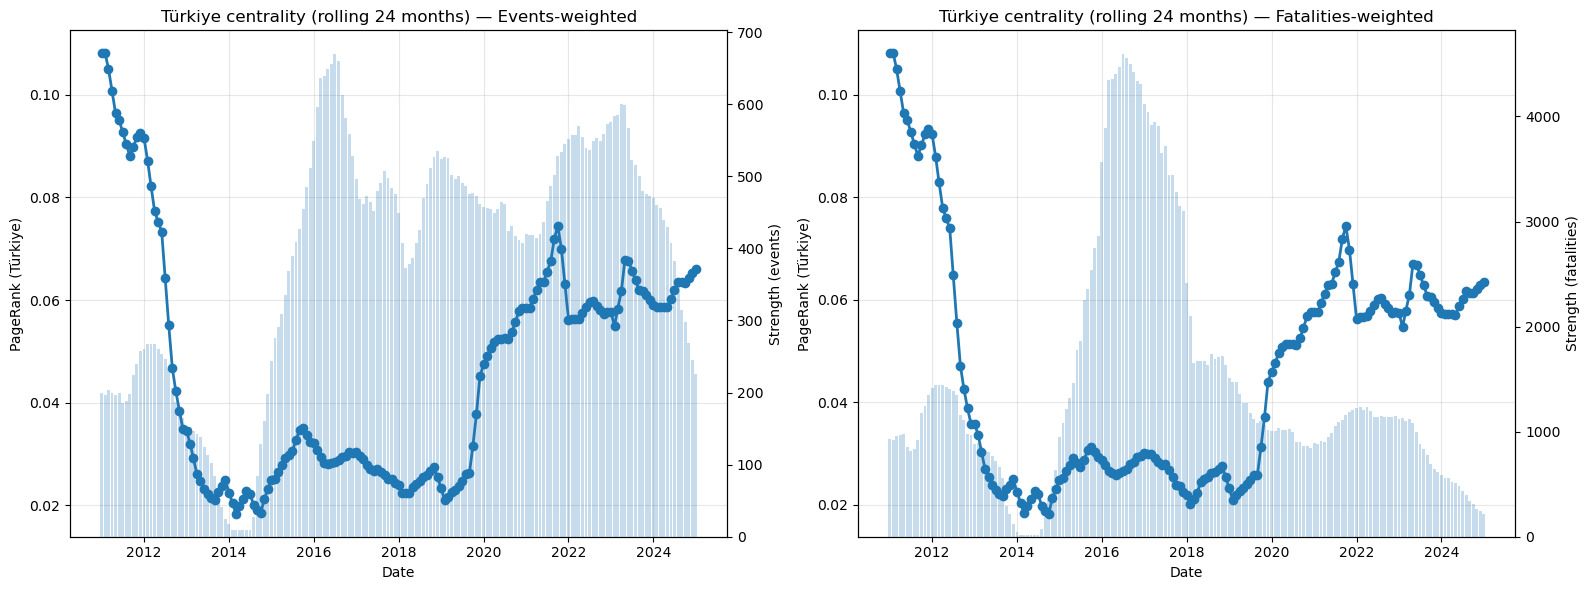

In [36]:
# --- Time-evolving centrality for Türkiye (rolling 24-month window) ---
# Works with either an existing df_filtered/df in memory or by loading the CSV you saved earlier.

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# ---------- 0) INPUT ----------
CSV_PATH = "GEDEvent_v25_1_extended.csv"  # fallback if df_filtered/df not in memory
YEAR_MIN, YEAR_MAX = 2010, 2025
REGION_COUNTRIES = {
    "Turkey", "Türkiye", "Syria", "Iraq", "Iran", "Libya"
}
TURKEY_NODE = "Government of Turkey"
WINDOW_MONTHS = 24
STEP_MONTHS = 1          # 1 month step

# ---------- 1) LOAD / PREP DATA ----------
if "df_filtered" in globals():
    base = df_filtered.copy()
elif "df" in globals():
    base = df.copy()
else:
    base = pd.read_csv(CSV_PATH)

# clean types / labels
data = (
    base.assign(
        country=lambda d: d["country"].astype(str).str.strip().replace({"Türkiye": "Turkey"}),
        side_a=lambda d: d["side_a"].astype(str).str.strip(),
        side_b=lambda d: d["side_b"].astype(str).str.strip(),
        best=lambda d: pd.to_numeric(d["best"], errors="coerce"),
        year=lambda d: pd.to_numeric(d["year"], errors="coerce"),
        date_start=lambda d: pd.to_datetime(d["date_start"], errors="coerce"),
    )
    .loc[
        lambda d: d["country"].isin(REGION_COUNTRIES)
        & d["year"].between(YEAR_MIN, YEAR_MAX)
    ]
    .dropna(subset=["side_a", "side_b", "date_start"])
    .copy()
)

# drop obviously empty labels
for col in ["side_a", "side_b"]:
    data = data.loc[~data[col].isin(["", "nan", "None"])]

# we’ll need a complete monthly index spanning the sample
month_start = pd.Timestamp(f"{YEAR_MIN}-01-01")
month_end   = pd.Timestamp(f"{YEAR_MAX}-12-31")
all_months  = pd.date_range(month_start, month_end, freq="MS")  # month starts

# ---------- 2) BUILD A GRAPH FROM A SLICE ----------
def graph_from_slice(df_slice: pd.DataFrame, weight_mode: str = "events") -> nx.Graph:
    """
    weight_mode: 'events' (each row = 1) or 'fatalities' (weight = 'best')
    """
    if df_slice.empty:
        return nx.Graph()
    if weight_mode == "fatalities":
        dfw = (
            df_slice.assign(w=lambda d: d["best"].fillna(0).clip(lower=0))
                    .groupby(["side_a", "side_b"], as_index=False)["w"].sum()
        )
    else:
        dfw = (
            df_slice.assign(w=1.0)
                    .groupby(["side_a", "side_b"], as_index=False)["w"].sum()
        )

    # undirected simple graph, weighted by 'w'
    G = nx.Graph()
    for _, r in dfw.iterrows():
        a, b, w = r["side_a"], r["side_b"], float(r["w"])
        if a == b or w <= 0:
            continue
        if G.has_edge(a, b):
            G[a][b]["weight"] += w
        else:
            G.add_edge(a, b, weight=w)
    return G

# ---------- 3) CENTRALITIES FOR THE FOCUS NODE ----------
def centralities(G: nx.Graph, focus: str):
    if G.number_of_nodes() == 0 or focus not in G:
        return np.nan, np.nan, np.nan, 0.0
    # PageRank with edge weights
    pr_all = nx.pagerank(G, weight="weight") if G.number_of_edges() else {n: 0 for n in G}
    pr = pr_all.get(focus, np.nan)
    # degree centrality (unweighted, relative to N-1)
    deg_c = nx.degree_centrality(G).get(focus, np.nan)
    # betweenness centrality (weighted shortest paths use 'weight')
    bet_c = nx.betweenness_centrality(G, weight="weight", normalized=True).get(focus, np.nan)
    # weighted degree ("strength")
    strength = float(sum(G[focus][nbr]["weight"] for nbr in G.neighbors(focus)))
    return pr, deg_c, bet_c, strength

# ---------- 4) ROLLING WINDOW TIME SERIES ----------
def rolling_centrality(df: pd.DataFrame, months=24, step=1, weight_mode="events") -> pd.DataFrame:
    rows = []
    half_label = int(months/2)

    for i in range(0, len(all_months) - months + 1, step):
        win_start = all_months[i]                               # first month in window
        win_end   = all_months[i + months - 1] + pd.offsets.MonthEnd(1)  # inclusive last day

        sl = df.loc[(df["date_start"] >= win_start) & (df["date_start"] <= win_end)]
        G  = graph_from_slice(sl, weight_mode=weight_mode)
        pr, dc, bc, strength = centralities(G, focus=TURKEY_NODE)

        label_date = win_start + pd.DateOffset(months=half_label)
        rows.append({"date": label_date, "pagerank": pr, "degree": dc,
                     "betweenness": bc, "strength": strength})

    out = pd.DataFrame(rows).set_index("date")
    return out

# compute series
ts_events = rolling_centrality(data, months=WINDOW_MONTHS, step=STEP_MONTHS, weight_mode="events")
ts_fatal  = rolling_centrality(data, months=WINDOW_MONTHS, step=STEP_MONTHS, weight_mode="fatalities")

# optional light smoothing for readability (3-point)
ts_events_s = ts_events.rolling(3, min_periods=1).mean()
ts_fatal_s  = ts_fatal.rolling(3, min_periods=1).mean()

# ---------- 5) PLOTS: SIDE-BY-SIDE ----------
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

# (A) Events-weighted network
ax = axes[0]
ax2 = ax.twinx()
ax.plot(ts_events_s.index, ts_events_s["pagerank"], marker="o", linewidth=2, label="PageRank (Türkiye)")
ax.set_title("Türkiye centrality (rolling 24 months) — Events-weighted")
ax.set_ylabel("PageRank (Türkiye)")
ax.set_xlabel("Date")
# secondary axis: strength (weighted degree in events)
ax2.bar(ts_events.index, ts_events["strength"], width=25, alpha=0.25, label="Türkiye strength (events)")
ax2.set_ylabel("Strength (events)")

# (B) Fatalities-weighted network
ax = axes[1]
ax2 = ax.twinx()
ax.plot(ts_fatal_s.index, ts_fatal_s["pagerank"], marker="o", linewidth=2, label="PageRank (Türkiye)")
ax.set_title("Türkiye centrality (rolling 24 months) — Fatalities-weighted")
ax.set_ylabel("PageRank (Türkiye)")
ax.set_xlabel("Date")
# secondary axis: strength (weighted degree in fatalities)
ax2.bar(ts_fatal.index, ts_fatal["strength"], width=25, alpha=0.25, label="Türkiye strength (fatalities)")
ax2.set_ylabel("Strength (fatalities)")

for a in axes:
    a.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


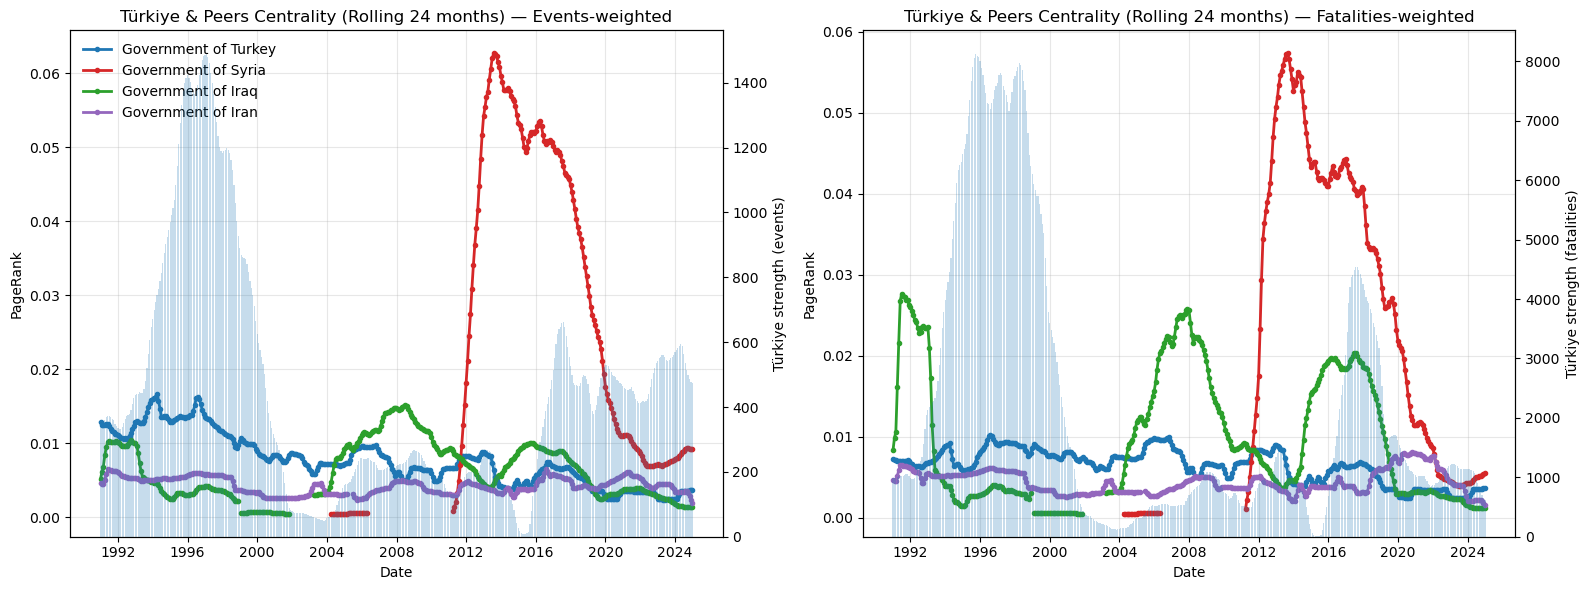

In [38]:
# === Load extended dataset ===
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Load from your saved CSV
df_filtered = pd.read_csv("GEDEvent_v25_1_extended.csv", low_memory=False)

# --- CONFIG ---
WINDOW_MONTHS = 24     # size of rolling window
STEP_MONTHS   = 1      # slide by 1 month
ACTORS = [
    "Government of Turkey",
    "Government of Syria",
    "Government of Iraq",
    "Government of Iran",
]

# --- Prepare / clean ---
data = (
    df_filtered.copy()
      .assign(
          side_a=lambda d: d["side_a"].astype(str).str.strip(),
          side_b=lambda d: d["side_b"].astype(str).str.strip(),
          best  =lambda d: pd.to_numeric(d["best"], errors="coerce"),
          date_start=lambda d: pd.to_datetime(d["date_start"], errors="coerce"),
      )
      .dropna(subset=["side_a", "side_b", "date_start"])
)

# Keep a tidy monthly timeline that covers your data
all_months = pd.date_range(
    data["date_start"].min().to_period("M").to_timestamp(),
    data["date_start"].max().to_period("M").to_timestamp(),
    freq="MS"
)

def build_graph(df_window: pd.DataFrame, weight_mode="events"):
    if df_window.empty:
        return nx.Graph(), pd.Series(dtype=float), pd.Series(dtype=float)

    if weight_mode == "fatalities":
        w = (
            df_window.groupby(["side_a", "side_b"], as_index=False)["best"]
                     .sum().rename(columns={"best": "w"})
        )
    else:
        w = (
            df_window.groupby(["side_a", "side_b"], as_index=False)
                     .size().rename(columns={"size": "w"})
        )

    G = nx.Graph()
    for _, r in w.iterrows():
        a, b, wt = r["side_a"], r["side_b"], float(r["w"])
        if a and b and a != "nan" and b != "nan":
            if G.has_edge(a, b):
                G[a][b]["weight"] += wt
            else:
                G.add_edge(a, b, weight=wt)

    if G.number_of_nodes() == 0:
        return G, pd.Series(dtype=float), pd.Series(dtype=float)

    pr = nx.pagerank(G, weight="weight")
    strength = {n: sum(d["weight"] for _, _, d in G.edges(n, data=True)) for n in G.nodes()}

    return G, pd.Series(pr, name="pagerank"), pd.Series(strength, name="strength")

def rolling_centrality_multi(df, actors, months=24, step=1, weight_mode="events"):
    rows = []
    for i in range(0, len(all_months) - months + 1, step):
        win_start = all_months[i]
        win_end   = (all_months[i + months - 1] + pd.offsets.MonthEnd(0))
        sl = df.loc[(df["date_start"] >= win_start) & (df["date_start"] <= win_end)]
        _, pr, st = build_graph(sl, weight_mode=weight_mode)

        row = {"date": win_end}
        for a in actors:
            row[a] = pr.get(a, np.nan)
            row[f"strength_{a}"] = st.get(a, 0.0)
        rows.append(row)

    out = pd.DataFrame(rows).set_index("date").sort_index()
    out_sm = out.rolling(3, min_periods=1).mean()  # smooth
    return out_sm

# Run
ts_ev = rolling_centrality_multi(data, ACTORS, months=WINDOW_MONTHS, step=STEP_MONTHS, weight_mode="events")
ts_fa = rolling_centrality_multi(data, ACTORS, months=WINDOW_MONTHS, step=STEP_MONTHS, weight_mode="fatalities")

# --- Plot ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=False)
colors = {
    "Government of Turkey": "tab:blue",
    "Government of Syria": "tab:red",
    "Government of Iraq": "tab:green",
    "Government of Iran": "tab:purple",
}

# Left: Events-weighted
ax = axes[0]
for actor in ACTORS:
    ax.plot(ts_ev.index, ts_ev[actor], label=actor, linewidth=2, marker="o", ms=3, color=colors.get(actor))
ax.set_title("Türkiye & Peers Centrality (Rolling 24 months) — Events-weighted")
ax.set_xlabel("Date"); ax.set_ylabel("PageRank"); ax.grid(True, alpha=0.3); ax.legend(frameon=False)
ax2 = ax.twinx()
ax2.bar(ts_ev.index, ts_ev["strength_Government of Turkey"], width=25, alpha=0.25, color="tab:blue")
ax2.set_ylabel("Türkiye strength (events)")

# Right: Fatalities-weighted
ax = axes[1]
for actor in ACTORS:
    ax.plot(ts_fa.index, ts_fa[actor], label=actor, linewidth=2, marker="o", ms=3, color=colors.get(actor))
ax.set_title("Türkiye & Peers Centrality (Rolling 24 months) — Fatalities-weighted")
ax.set_xlabel("Date"); ax.set_ylabel("PageRank"); ax.grid(True, alpha=0.3)
ax2 = ax.twinx()
ax2.bar(ts_fa.index, ts_fa["strength_Government of Turkey"], width=25, alpha=0.25, color="tab:blue")
ax2.set_ylabel("Türkiye strength (fatalities)")

plt.tight_layout()
plt.show()


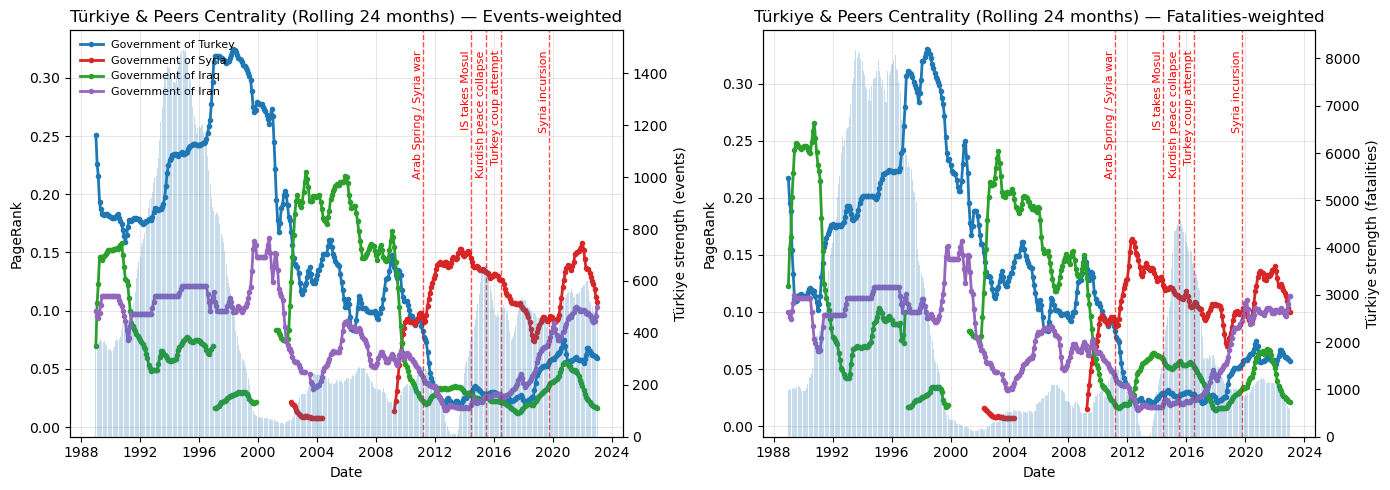

In [40]:
# ==== Rolling Centrality for Türkiye & Peers (Events- vs Fatalities-weighted) ====
# Requirements: pandas, numpy, networkx, matplotlib
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# -----------------------------
# 0) Load & basic cleaning
# -----------------------------
CSV_PATH = "GEDEvent_v25_1_extended.csv"  # produced earlier
df_base = pd.read_csv(CSV_PATH, low_memory=False)

# Ensure key fields are in the right dtype
df_base["side_a"] = df_base["side_a"].astype(str).str.strip()
df_base["side_b"] = df_base["side_b"].astype(str).str.strip()
df_base["country"] = df_base["country"].astype(str).str.strip().replace({"Türkiye": "Turkey"})
df_base["best"] = pd.to_numeric(df_base["best"], errors="coerce")
df_base["date_start"] = pd.to_datetime(df_base["date_start"], errors="coerce")

# Filter: countries of interest + date sanity
REGION_COUNTRIES = [
    "Turkey", "Syria", "Iraq", "Iran", "Libya"
]
df = df_base.loc[
    df_base["country"].isin(REGION_COUNTRIES) &
    df_base["date_start"].notna() &
    df_base["side_a"].ne("") & df_base["side_b"].ne("")
].copy()

# Keep rows where best is numeric (for fatalities-weighted); events-weighted can tolerate NaN best
# (we won't drop them here—later code uses counts for events)
# Optional: df.loc[df["best"].isna(), "best"] = 0

# ---------------------------------------------------
# 1) Helpers to build networks & compute centralities
# ---------------------------------------------------
def _collapse_edges(frame: pd.DataFrame, weight_mode: str):
    """
    Collapse dyads to one edge with a weight.
    weight_mode='events'  -> weight = count of events
    weight_mode='fatalities' -> weight = sum of 'best'
    Returns DataFrame with columns: side_a, side_b, weight
    """
    frame = frame.loc[frame["side_a"].ne("") & frame["side_b"].ne("")]
    if weight_mode == "events":
        g = (frame.groupby(["side_a", "side_b"])
                    .size().reset_index(name="weight"))
    elif weight_mode == "fatalities":
        g = (frame.groupby(["side_a", "side_b"])["best"]
                    .sum().reset_index(name="weight"))
        g["weight"] = g["weight"].fillna(0)
    else:
        raise ValueError("weight_mode must be 'events' or 'fatalities'")
    return g

def _graph_from_edges(edges: pd.DataFrame) -> nx.Graph:
    """Undirected weighted graph from collapsed dyads."""
    G = nx.Graph()
    for _, r in edges.iterrows():
        a, b, w = r["side_a"], r["side_b"], float(r["weight"])
        if a == "" or b == "" or a == b:
            continue
        if G.has_edge(a, b):
            G[a][b]["weight"] += w
        else:
            G.add_edge(a, b, weight=w)
    return G

def _centrality_for_nodes(G: nx.Graph, nodes: list[str]):
    """
    Compute centralities on G. Returns:
      - pr: dict of PageRank (weighted)
      - strength: dict of weighted degree (sum of edge weights)
    Missing nodes get NaN.
    """
    if G.number_of_nodes() == 0:
        pr = {n: np.nan for n in nodes}
        strength = {n: np.nan for n in nodes}
        return pr, strength

    # Weighted PageRank (falls back gracefully on disconnected graphs)
    try:
        pr_full = nx.pagerank(G, alpha=0.85, weight="weight", tol=1e-06, max_iter=1000)
    except nx.PowerIterationFailedConvergence:
        pr_full = {n: np.nan for n in G.nodes}

    # Strength (weighted degree)
    str_full = dict(G.degree(weight="weight"))

    pr = {n: pr_full.get(n, np.nan) for n in nodes}
    strength = {n: str_full.get(n, np.nan) for n in nodes}
    return pr, strength

def rolling_centrality_multi(
    data: pd.DataFrame,
    actors: list[str],
    months: int = 24,
    step: int = 1,
    weight_mode: str = "events",
):
    """
    Compute rolling-Window centrality time series for a list of actors.
    Returns (ts_pr, ts_strength) as DataFrames indexed by month-start.
      ts_pr columns: each actor's PageRank
      ts_strength columns: 'strength_<actor>' for each actor
    """
    # build complete monthly index
    start_m = data["date_start"].min().to_period("M").to_timestamp()
    end_m   = data["date_start"].max().to_period("M").to_timestamp()
    all_months = pd.date_range(start_m, end_m, freq="MS")

    out_rows_pr = []
    out_rows_str = []
    for i in range(0, len(all_months) - months + 1, step):
        win_start = all_months[i]
        # guard the right edge
        j = min(i + months, len(all_months) - 1)
        # make window end exclusive of next month; inclusive visually
        win_end = all_months[j] - pd.offsets.Day(1)

        sl = data.loc[(data["date_start"] >= win_start) & (data["date_start"] <= win_end)]
        edges = _collapse_edges(sl, weight_mode=weight_mode)
        G = _graph_from_edges(edges)

        pr, strength = _centrality_for_nodes(G, actors)

        row_pr = {"date": win_start}
        row_pr.update(pr)
        out_rows_pr.append(row_pr)

        row_str = {"date": win_start}
        for a in actors:
            row_str[f"strength_{a}"] = strength[a]
        out_rows_str.append(row_str)

    ts_pr = pd.DataFrame(out_rows_pr).set_index("date")
    ts_strength = pd.DataFrame(out_rows_str).set_index("date")
    return ts_pr, ts_strength

# ---------------------------------------
# 2) Configure actors & compute timeseries
# ---------------------------------------
ACTORS = [
    "Government of Turkey",
    "Government of Syria",
    "Government of Iraq",
    "Government of Iran",
]
TR = "Government of Turkey"

# Events-weighted network
ts_ev_pr, ts_ev_str = rolling_centrality_multi(
    df, actors=ACTORS, months=24, step=1, weight_mode="events"
)

# Fatalities-weighted network
ts_fa_pr, ts_fa_str = rolling_centrality_multi(
    df, actors=ACTORS, months=24, step=1, weight_mode="fatalities"
)

# (Optional) light smoothing for readability
ts_ev_pr_s = ts_ev_pr.rolling(3, min_periods=1).mean()
ts_fa_pr_s = ts_fa_pr.rolling(3, min_periods=1).mean()

# ---------------------------------------
# 3) Plot (side-by-side) + annotations
# ---------------------------------------
colors = {
    "Government of Turkey": "tab:blue",
    "Government of Syria": "tab:red",
    "Government of Iraq": "tab:green",
    "Government of Iran": "tab:purple",
}

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=False)

# LEFT: Events-weighted
ax = axes[0]
for actor in ACTORS:
    ax.plot(ts_ev_pr_s.index, ts_ev_pr_s[actor], label=actor,
            linewidth=2, marker="o", ms=3, color=colors.get(actor, None))
ax.set_title("Türkiye & Peers Centrality (Rolling 24 months) — Events-weighted")
ax.set_xlabel("Date")
ax.set_ylabel("PageRank")
ax.grid(True, alpha=0.3)
ax.legend(loc="upper left", ncol=1, fontsize=8, frameon=False)

# Secondary y-axis: Türkiye strength (events)
ax2 = ax.twinx()
ax2.bar(ts_ev_str.index, ts_ev_str[f"strength_{TR}"], width=25, alpha=0.25, color="tab:blue",
        label="Türkiye strength (events)")
ax2.set_ylabel("Türkiye strength (events)")

# RIGHT: Fatalities-weighted
ax = axes[1]
for actor in ACTORS:
    ax.plot(ts_fa_pr_s.index, ts_fa_pr_s[actor], label=actor,
            linewidth=2, marker="o", ms=3, color=colors.get(actor, None))
ax.set_title("Türkiye & Peers Centrality (Rolling 24 months) — Fatalities-weighted")
ax.set_xlabel("Date")
ax.set_ylabel("PageRank")
ax.grid(True, alpha=0.3)

ax2 = ax.twinx()
ax2.bar(ts_fa_str.index, ts_fa_str[f"strength_{TR}"], width=25, alpha=0.25, color="tab:blue",
        label="Türkiye strength (fatalities)")
ax2.set_ylabel("Türkiye strength (fatalities)")

# --- Annotations for key events (both panels) ---
annotations = [
    {"year": "2011-03", "label": "Arab Spring / Syria war"},
    {"year": "2014-06", "label": "IS takes Mosul"},
    {"year": "2015-07", "label": "Kurdish peace collapse"},
    {"year": "2016-07", "label": "Turkey coup attempt"},
    {"year": "2019-10", "label": "Syria incursion"},
]
for ax in axes:
    y_top = ax.get_ylim()[1]
    for ann in annotations:
        x = pd.to_datetime(ann["year"])
        ax.axvline(x, color="red", linestyle="--", alpha=0.7, linewidth=1)
        ax.text(x, y_top * 0.95, ann["label"], rotation=90, va="top",
                ha="right", fontsize=8, color="red")

plt.tight_layout()
plt.show()


In [44]:
import re
import pandas as pd

# --- column-layout detector, now supporting: ---
#  (A) pagerank columns named exactly as actor; strength as "strength_<actor>"
#  (B) "pagerank_<actor>" + "strength_<actor>"
#  (C) "pagerank (Actor)" + "strength (Actor)"
#  (D) MultiIndex ('pagerank'|'strength', 'Actor')
def _infer_actor_columns(df: pd.DataFrame):
    if isinstance(df.columns, pd.MultiIndex):
        metrics = {lvl.lower() for lvl in df.columns.get_level_values(0)}
        if "pagerank" in metrics and "strength" in metrics:
            actors = sorted(df.columns.get_level_values(-1).unique())
            def get_cols(actor):
                pr = ("pagerank", actor)
                st = ("strength", actor)
                return (pr if pr in df.columns else None,
                        st if st in df.columns else None)
            return actors, get_cols

    cols = list(df.columns)
    lower = {c.lower(): c for c in cols}

    # (A) pagerank = actor name; strength = "strength_<actor>"
    strength_pref = [c for c in cols if c.lower().startswith("strength_")]
    # actors are those columns that are NOT strength_ and are numeric (pagerank series)
    candidate_pr = [c for c in cols if not c.lower().startswith("strength_")]
    # Heuristic: keep numeric-only columns as pagerank candidates
    pr_numeric = [c for c in candidate_pr if pd.api.types.is_numeric_dtype(df[c])]
    # If every strength col has a matching actor col, use this pattern
    if strength_pref and pr_numeric:
        actors = []
        for s in strength_pref:
            actor = s.split("_", 1)[1]
            if actor in pr_numeric:
                actors.append(actor)
        actors = sorted(set(actors))
        if actors:
            def get_cols(actor):
                pr = actor
                st = f"strength_{actor}"
                return (pr if pr in df.columns else None,
                        st if st in df.columns else None)
            return actors, get_cols

    # (B) "pagerank_<actor>" + "strength_<actor>"
    pr_pref = [c for c in cols if c.lower().startswith("pagerank_")]
    if pr_pref and strength_pref:
        actors = sorted({c.split("_", 1)[1] for c in pr_pref})
        def get_cols(actor):
            pr = f"pagerank_{actor}"
            st = f"strength_{actor}"
            return (pr if pr in df.columns else None,
                    st if st in df.columns else None)
        return actors, get_cols

    # (C) "pagerank (Actor)" + "strength (Actor)"
    pr_like = [c for c in cols if c.lower().startswith("pagerank")]
    st_like = [c for c in cols if c.lower().startswith("strength")]
    if pr_like and st_like:
        def parse_actor_from(c, key="pagerank"):
            m = re.search(rf"{key}\s*[\(_\- ]\s*(.+?)\s*\)?$", c, flags=re.I)
            return m.group(1) if m else None
        actors = sorted({parse_actor_from(c, "pagerank") for c in pr_like if parse_actor_from(c, "pagerank")})
        if actors:
            def get_cols(actor):
                pr = next((c for c in pr_like if actor in c), None)
                st = next((c for c in st_like if actor in c), None)
                return pr, st
            return actors, get_cols

    # Fallback
    return [], lambda actor: (None, None)


def summarise_network_df(ts_df: pd.DataFrame, mode: str) -> pd.DataFrame:
    actors, get_cols = _infer_actor_columns(ts_df)
    if not actors:
        print("⚠️ Could not infer actor columns; first few columns:\n", list(ts_df.columns)[:12], "...")
        return pd.DataFrame(columns=[
            "network","actor","mean_pagerank","max_pagerank","max_date",
            "mean_strength","sum_strength","share_strength_%","rank_by_mean_pagerank","rank_by_sum_strength"
        ])

    rows = []
    for actor in actors:
        pr_col, st_col = get_cols(actor)
        if pr_col is None or st_col is None or pr_col not in ts_df.columns or st_col not in ts_df.columns:
            continue
        d = ts_df[[pr_col, st_col]].dropna()
        if d.empty:
            continue
        mean_pr = d[pr_col].mean()
        max_pr  = d[pr_col].max()
        max_dt  = d[pr_col].idxmax()
        if hasattr(max_dt, "date"):
            max_dt = max_dt.date()
        mean_str = d[st_col].mean()
        sum_str  = d[st_col].sum()
        rows.append({
            "network": mode,
            "actor": actor,
            "mean_pagerank": mean_pr,
            "max_pagerank":  max_pr,
            "max_date":      max_dt,
            "mean_strength": mean_str,
            "sum_strength":  sum_str
        })

    out = pd.DataFrame(rows)
    if out.empty:
        print("⚠️ Built no rows — check your ts_* columns naming.")
        return out

    out = out.sort_values("mean_pagerank", ascending=False).reset_index(drop=True)
    total_strength = out["sum_strength"].sum()
    out["share_strength_%"] = 100 * out["sum_strength"] / total_strength if total_strength > 0 else 0.0
    out["rank_by_mean_pagerank"] = out["mean_pagerank"].rank(ascending=False, method="dense").astype(int)
    out["rank_by_sum_strength"]  = out["sum_strength"].rank(ascending=False, method="dense").astype(int)
    return out


# ==== Build & display ====
summary_events     = summarise_network_df(ts_ev, "events")
summary_fatalities = summarise_network_df(ts_fa, "fatalities")

print("=== Events-weighted network ===")
try:
    display(summary_events.style.format({
        "mean_pagerank": "{:.4f}",
        "max_pagerank":  "{:.4f}",
        "mean_strength": "{:,.0f}",
        "sum_strength":  "{:,.0f}",
        "share_strength_%": "{:.1f}"
    }))
except Exception:
    print(summary_events)

print("\n=== Fatalities-weighted network ===")
try:
    display(summary_fatalities.style.format({
        "mean_pagerank": "{:.4f}",
        "max_pagerank":  "{:.4f}",
        "mean_strength": "{:,.0f}",
        "sum_strength":  "{:,.0f}",
        "share_strength_%": "{:.1f}"
    }))
except Exception:
    print(summary_fatalities)

# Quick Türkiye one-liners for your write-up
TURKEY = "Government of Turkey"
def quote(df, label):
    if TURKEY in df["actor"].values:
        r = df.loc[df["actor"] == TURKEY].iloc[0]
        print(f"[{label}] Türkiye mean PR={r['mean_pagerank']:.4f}, "
              f"max PR={r['max_pagerank']:.4f} on {r['max_date']}, "
              f"share of network strength={r['share_strength_%']:.1f}% "
              f"(rank PR #{r['rank_by_mean_pagerank']}, rank strength #{r['rank_by_sum_strength']}).")
    else:
        print(f"[{label}] Türkiye not found.")
quote(summary_events, "Events-weighted")
quote(summary_fatalities, "Fatalities-weighted")

# Save CSVs
summary_events.to_csv("summary_centrality_events_24m.csv", index=False)
summary_fatalities.to_csv("summary_centrality_fatalities_24m.csv", index=False)
print("\nSaved: summary_centrality_events_24m.csv  |  summary_centrality_fatalities_24m.csv")


=== Events-weighted network ===


,network,actor,mean_pagerank,max_pagerank,max_date,mean_strength,sum_strength,share_strength_%,rank_by_mean_pagerank,rank_by_sum_strength
0,events,Government of Syria,0.0263,0.0627,2013-07-31,"9,305","1,786,644",83.1,1,1
1,events,Government of Turkey,0.0077,0.0166,1994-03-31,448,"183,084",8.5,2,2
2,events,Government of Iraq,0.0062,0.0151,2008-06-30,408,"159,835",7.4,3,3
3,events,Government of Iran,0.0043,0.0065,1991-05-31,51,"20,666",1.0,4,4



=== Fatalities-weighted network ===


,network,actor,mean_pagerank,max_pagerank,max_date,mean_strength,sum_strength,share_strength_%,rank_by_mean_pagerank,rank_by_sum_strength
0,fatalities,Government of Syria,0.0237,0.0574,2013-08-31,"43,207","8,295,784",70.3,1,1
1,fatalities,Government of Iraq,0.0093,0.0277,1991-06-30,"6,441","2,524,940",21.4,2,2
2,fatalities,Government of Turkey,0.0064,0.0102,1996-07-31,"2,185","893,499",7.6,3,3
3,fatalities,Government of Iran,0.0044,0.0081,2020-10-31,219,"88,914",0.8,4,4


[Events-weighted] Türkiye mean PR=0.0077, max PR=0.0166 on 1994-03-31, share of network strength=8.5% (rank PR #2, rank strength #2).
[Fatalities-weighted] Türkiye mean PR=0.0064, max PR=0.0102 on 1996-07-31, share of network strength=7.6% (rank PR #3, rank strength #3).

Saved: summary_centrality_events_24m.csv  |  summary_centrality_fatalities_24m.csv


In [45]:
# Compact comparative summary table for key actors
actors_focus = ["Government of Turkey", "Government of Syria", "Government of Iraq", "Government of Iran"]

# Filter summaries to those actors
compact_events = summary_events[summary_events["actor"].isin(actors_focus)].copy()
compact_fatal  = summary_fatalities[summary_fatalities["actor"].isin(actors_focus)].copy()

# Select key columns for display
cols_show = [
    "actor", "mean_pagerank", "max_pagerank", "max_date",
    "share_strength_%", "rank_by_mean_pagerank", "rank_by_sum_strength"
]

compact_events = compact_events[cols_show].assign(network="Events-weighted")
compact_fatal  = compact_fatal[cols_show].assign(network="Fatalities-weighted")

# Combine into one table
compact_summary = pd.concat([compact_events, compact_fatal], ignore_index=True)

# Order nicely
compact_summary = compact_summary[["network"] + cols_show]

# Display
import tabulate
print(tabulate.tabulate(compact_summary, headers="keys", tablefmt="github", showindex=False))

# Save as CSV for appendix
compact_summary.to_csv("summary_centrality_compact.csv", index=False)
print("\nSaved compact summary to: summary_centrality_compact.csv")


| network             | actor                |   mean_pagerank |   max_pagerank | max_date   |   share_strength_% |   rank_by_mean_pagerank |   rank_by_sum_strength |
|---------------------|----------------------|-----------------|----------------|------------|--------------------|-------------------------|------------------------|
| Events-weighted     | Government of Syria  |      0.0263374  |     0.062684   | 2013-07-31 |          83.0909   |                       1 |                      1 |
| Events-weighted     | Government of Turkey |      0.00773342 |     0.0166474  | 1994-03-31 |           8.51461  |                       2 |                      2 |
| Events-weighted     | Government of Iraq   |      0.00617697 |     0.0151213  | 2008-06-30 |           7.43338  |                       3 |                      3 |
| Events-weighted     | Government of Iran   |      0.00427558 |     0.00646158 | 1991-05-31 |           0.961084 |                       4 |                      4 

In [46]:
compact_summary

,network,actor,mean_pagerank,max_pagerank,max_date,share_strength_%,rank_by_mean_pagerank,rank_by_sum_strength
0,Events-weighted,Government of Syria,0.026337,0.062684,2013-07-31,83.090925,1,1
1,Events-weighted,Government of Turkey,0.007733,0.016647,1994-03-31,8.514609,2,2
2,Events-weighted,Government of Iraq,0.006177,0.015121,2008-06-30,7.433382,3,3
3,Events-weighted,Government of Iran,0.004276,0.006462,1991-05-31,0.961084,4,4
4,Fatalities-weighted,Government of Syria,0.023720,0.057361,2013-08-31,70.284567,1,1
5,Fatalities-weighted,Government of Iraq,0.009300,0.027666,1991-06-30,21.392108,2,2
6,Fatalities-weighted,Government of Turkey,0.006427,0.010174,1996-07-31,7.570016,3,3
7,Fatalities-weighted,Government of Iran,0.004424,0.008067,2020-10-31,0.753308,4,4
